# A Data Science Framework: 

Architecture for the bladder cancer analytics and prediction via machine-learning

#Define the Problem: Traditional way to diagnosis or prognosis cancer relys on biopsy, cancer is discovered usually after it reached a certain size or entern the mid/late stage. At the same time, biopsy also relys on the pathologist's experience. Different pathologist might have different opinion against the cancer samples. Developing a non-invasive, and object measurement of patients' sample and making un-bised judgement on the biopsy is the goal in the cancer clinical communities. This study measured over 2500 miRNA genes from the peripheral blood samples of bladder cancer patients of different stages, plus samples from normal persons as well as samples from other cancers as control.

We hope this study can identify biomarker signatures in the bladder cancer that might be used for diagnosis/prognosis/cancer staging. Through machine learning and predictive analytics, we aim to develop a method that can be used to predict bladder cancer in the early stage.
●Hypothesis or project topic
➢Cancer is a disease of molecular dis-regulations, Is there a unique molecular signature for bladder cancer samples? 
➢If there is a signature, can we build a data product that can identify bladder cancer for a given blood sample?
➢Can non-invasive, early detection of bladder cancer achievable?, with high accuracy and high sensitivity?


#Gather the Data: 
➢Dataset is downloaded from GEO/NCBI/NIH; 
➢This data set contains profiles of 972 samples, which consist of 392 bladder cancer, 100 non-cancer control, and 480 other types of cancer patients. Each sample has about 2600 variables to describe it.
➢Bladder cancer, non-cancer control, other cancers are the class labels.
➢miRNA measurement and gender/age/locations are the major features.


#Prepare Data for Consumption: 

This step is often referred to as data wrangling, a required process to turn “wild” data into “manageable” data. Data wrangling includes implementing data architectures for storage and processing, developing data governance standards for quality and control, data extraction (i.e. ETL and web scraping), and data cleaning to identify aberrant, missing, or outlier data points.

#Perform Exploratory Analysis: Anybody who has ever worked with data knows, garbage-in, garbage-out (GIGO). Therefore, it is important to deploy descriptive and graphical statistics to look for potential problems, patterns, classifications, correlations and comparisons in the dataset. In addition, data categorization (i.e. qualitative vs quantitative) is also important to understand and select the correct hypothesis test or data model.

#Model Data: Like descriptive and inferential statistics, data modeling can either summarize the data or predict future outcomes. Your dataset and expected results, will determine the algorithms available for use. It's important to remember, algorithms are tools and not magical wands or silver bullets. You must still be the master craft (wo)man that knows how-to select the right tool for the job. An analogy would be asking someone to hand you a Philip screwdriver, and they hand you a flathead screwdriver or worst a hammer. At best, it shows a complete lack of understanding. At worst, it makes completing the project impossible. The same is true in data modelling. The wrong model can lead to poor performance at best and the wrong conclusion (that’s used as actionable intelligence) at worst.

#Validate and Implement Data Model: After you've trained your model based on a subset of your data, it's time to test your model. This helps ensure you haven't overfit your model or made it so specific to the selected subset, that it does not accurately fit another subset from the same dataset. In this step we determine if our model overfit, generalize, or underfit our dataset.

#Optimize and Strategize: This is the "bionic man" step, where you iterate back through the process to make it better...stronger...faster than it was before. As a data scientist, your strategy should be to outsource developer operations and application plumbing, so you have more time to focus on recommendations and design. Once you're able to package your ideas, this becomes your “currency exchange" rate.
    
    

# Workflow goals

#The data science solutions workflow solves for seven major goals.
#Classifying. We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.
#Correlating. One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.
#Converting. For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.
#Completing. Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.
#Correcting. We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.
#Creating. Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.
#Charting. How to select the right visualization plots and charts depending on nature of the data and the solution goals.

In [1]:
# Imports - you'll need some of these later, but it's traditional to put them all at the beginning.
# Downloading from the data server only need once.

import os
import csv
import json

#from collections import Counter
from operator import itemgetter
from requests import get


def download(download_url, output_file):
    """
    Downloads a URL and writes it to the specified path. The "path" 
    is like the mailing address for the file - it tells the function 
    where on your computer to send it!
    
    Also note the use of "with" to automatically close files - this 
    is a good standard practice to follow.
    """
    with open(output_file,'wb') as f:
        response = get(download_url)
        f.write(response.content)
        
        
## Write the Python to execute the function and download the file here:
url = "http://ftp.ncbi.nlm.nih.gov/geo/series/FSE/113nnn/GSE113486/matrix/GSE113486_series_matrix.txt.gz"
path = "C:/BigData/DSCert/input/GSE113486_series_matrix.txt.gz"


#to avoid repeated downloading, the following two linws are commended out:

#download(url, path)
#os.system("gunzip path")

#bladder_cancer_file = "C:\Users\Liu_PC\Documents\Georgetown/GSE113486_series_matrix.txt"
bladder_cancer_file = "C:/BigData/DSCert/input/GSE113486_series_matrix.txt"

#gunzip the downloaded file. This will need be done only once. For analytical purpose, the unzipped file will 
#usually opened many times during debugging and texting
 

In [2]:
#Main program

#clean the memory
#in ipython
%reset -f 

#in python
import gc
gc.collect()

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy import stats

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
#show plots in the Jupyter Notebook
%matplotlib inline
#configure visualization defaults
sns.set(style='white', context='notebook', palette='deep')
sns.set_style('white')


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ClassPredictionError
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)


#Acquire data
#The Python Pandas packages helps us work with our datasets. We start by acquiring the "master" data generated by computer
#we will split the data into training and testing datasets later.
#
#downloaded master file for this project: 

bladder_cancer_file = "C:/Users/Liu_PC/Documents/Georgetown/GSE113486_series_matrix.txt"

df = pd.read_csv(bladder_cancer_file, delimiter="\t", skiprows = 48, skipfooter = 1,header = None,  engine='python') 
""""
ro1 = list(range(0,50))
ro2 = list(range(51,73))
d =  ro1 +  ro2
print(d)
 
df = pd.read_csv(bladder_cancer_file, delimiter="\t", skiprows = d, skipfooter =1, header = None, engine ='python') 

#df = pd.read_csv(bladder_cancer_file, delimiter="\t", skiprows = 73)
#df.shape
"""


'"\nro1 = list(range(0,50))\nro2 = list(range(51,73))\nd =  ro1 +  ro2\nprint(d)\n \ndf = pd.read_csv(bladder_cancer_file, delimiter="\t", skiprows = d, skipfooter =1, header = None, engine =\'python\') \n\n#df = pd.read_csv(bladder_cancer_file, delimiter="\t", skiprows = 73)\n#df.shape\n'

data analysis and wrangling

In [3]:
#Re-organize the table:

#table end  line is junk, remove it
#df.drop(df.tail(1).index, inplace=True) 

df3 =pd.concat([df.iloc[[25],:], df.iloc[[2],:], df.drop([2, 25], axis=0)], axis=0)

#df3 =pd.concat([df.iloc[[25],:], df.iloc[[2],:], df.drop([2, 25], axis=0)], axis=0)

#df3 =pd.concat(df.iloc[[2],:], [df.iloc[[25],:], df.drop([2, 25], axis=0)], axis=0)


del df

#df3.head(10)

In [4]:
df3.tail(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972
2586,MIMAT0032116,6.507,5.946,6.058,6.315,6.788,6.825,5.517,6.913,6.598,6.438,6.375,7.244,6.945,7.055,2.033,7.192,6.633,6.304,8.199,7.353,5.964,5.989,7.659,6.740,5.694,4.501,5.932,6.779,6.421,7.055,7.186,6.685,6.258,7.063,6.640,6.600,5.785,6.526,7.117,6.604,5.137,5.644,7.009,6.991,6.124,7.204,7.529,6.032,5.830,7.572,6.405,6.478,6.395,6.582,6.734,6.744,5.332,7.147,5.239,5.999,7.621,5.965,6.706,6.481,6.328,5.338,6.412,7.084,6.643,6.416,6.437,5.621,5.076,6.577,6.658,-0.094,6.709,5.952,7.118,6.717,6.231,7.048,5.867,2.946,5.697,6.654,5.983,6.437,5.867,6.879,6.005,7.213,6.578,7.014,5.992,6.045,6.530,5.630,6.242,...,8.221,5.928,6.542,4.905,5.639,5.655,4.008,5.838,4.790,6.063,6.577,6.263,5.848,6.107,5.919,8.023,6.882,6.807,5.948,6.455,6.936,6.092,0.150,5.509,6.235,6.311,5.758,6.191,6.245,6.591,5.300,6.687,6.780,7.008,6.588,5.034,5.998,6.118,6.063,7.043,6.729,6.424,1.432,5.420,7.074,7.352,6.756,6.303,5.748,6.522,6.770,6.904,5.790,6.057,5.753,6.108,4.909,7.018,6.118,5.489,6.841,6.180,6.438,7.334,3.944,6.247,6.027,6.717,6.256,4.480,6.918,5.203,5.332,5.716,5.899,4.976,5.990,6.148,6.276,6.173,5.519,6.288,6.348,5.421,6.172,6.288,5.113,5.273,5.785,8.143,7.284,6.564,6.383,7.050,1.765,4.981,6.421,5.860,4.031,6.317
2587,MIMAT0033692,3.906,0.765,4.482,2.759,6.695,4.682,1.510,4.670,6.062,0.801,4.177,5.342,6.195,7.070,2.033,1.490,2.836,5.325,6.567,2.030,1.528,6.493,7.043,6.004,4.357,3.117,6.403,6.706,3.217,0.112,1.289,7.333,6.778,6.425,6.605,4.988,7.076,5.346,5.637,0.912,5.974,4.314,5.068,6.484,5.238,6.066,6.269,5.665,0.419,4.521,5.720,5.939,3.480,4.400,5.668,5.302,4.388,0.690,4.339,0.085,0.804,1.863,1.008,5.351,4.108,0.299,-0.191,2.067,5.132,5.647,6.832,1.196,0.387,5.399,7.509,7.140,3.700,5.887,2.293,5.283,3.906,4.635,4.556,3.441,6.568,5.671,3.648,5.057,-0.814,4.778,4.904,3.515,6.775,4.774,5.401,5.148,5.861,5.898,5.985,...,4.275,5.309,6.319,7.423,6.075,5.557,-0.366,5.060,3.741,6.288,6.074,5.509,4.933,5.108,4.939,8.023,4.977,5.060,4.117,5.192,5.353,5.425,6.800,4.889,5.589,5.781,5.135,5.597,5.832,6.006,3.183,6.207,5.997,6.385,5.756,4.337,6.072,6.322,6.211,5.476,5.436,5.153,5.881,5.358,4.738,5.200,5.283,5.270,5.463,6.332,6.110,5.831,6.083,5.685,4.587,4.008,5.390,5.722,4.783,5.453,6.151,6.116,5.189,2.708,3.944,4.764,5.702,1.179,5.672,0.337,4.754,-0.028,1.028,4.913,5.171,5.760,4.403,3.774,5.680,6.218,5.313,5.346,5.509,5.975,-0.808,4.228,5.630,5.638,5.261,5.791,3.917,4.416,7.126,4.918,5.306,5.108,5.440,7.004,0.071,5.534
2588,MIMAT0035542,-1.061,0.765,2.917,5.028,5.987,-0.486,4.643,1.320,3.480,0.801,0.820,5.649,6.440,1.887,6.882,6.889,0.864,5.470,6.235,2.030,5.726,5.369,1.991,0.908,5.851,0.971,1.140,0.500,0.716,0.112,6.063,0.513,0.699,4.755,1.497,2.760,0.942,4.480,4.266,0.912,5.379,3.586,5.784,6.794,0.492,3.977,5.243,0.652,4.731,5.420,5.086,5.311,-0.017,5.053,2.044,0.455,3.104,0.690,3.631,2.421,0.804,0.182,4.465,4.374,0.000,0.299,-0.191,-0.245,-0.008,4.910,4.452,0.044,0.387,-0.542,4.612,7.445,0.475,5.945,6.201,2.707,-1.183,4.800,-0.959,-0.137,1.706,3.749,4.126,4.950,-0.814,-1.030,-0.329,-0.577,1.743,0.982,3.975,-0.814,2.203,1.542,3.618,...,5.140,-0.457,5.957,6.793,4.121,1.753,-0.366,-1.499,0.309,-0.305,4.046,4.107,2.882,4.219,0.699,8.023,4.226,4.207,0.134,4.150,3.599,2.735,0.150,2.794,0.138,2.311,-1.413,3.942,2.667,4.158,5.171,0.990,3.906,3.182,4.706,2.708,0.090,4.688,-0.

In [5]:
"""
new_header = df3.iloc[0] #grab the 7th row for the header

df3 = df3[1:]

df3.columns = new_header #set the header row as the df header
"""
# Rename the dataframe's column values with the header variable


df3 = df3.drop([5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24], axis=0) 

#table end  line is junk
#df3.drop(df3.tail(1).index, inplace=True) 

df3.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972
25,ID_REF,GSM3106847,GSM3106848,GSM3106849,GSM3106850,GSM3106851,GSM3106852,GSM3106853,GSM3106854,GSM3106855,GSM3106856,GSM3106857,GSM3106858,GSM3106859,GSM3106860,GSM3106861,GSM3106862,GSM3106863,GSM3106864,GSM3106865,GSM3106866,GSM3106867,GSM3106868,GSM3106869,GSM3106870,GSM3106871,GSM3106872,GSM3106873,GSM3106874,GSM3106875,GSM3106876,GSM3106877,GSM3106878,GSM3106879,GSM3106880,GSM3106881,GSM3106882,GSM3106883,GSM3106884,GSM3106885,GSM3106886,GSM3106887,GSM3106888,GSM3106889,GSM3106890,GSM3106891,GSM3106892,GSM3106893,GSM3106894,GSM3106895,GSM3106896,GSM3106897,GSM3106898,GSM3106899,GSM3106900,GSM3106901,GSM3106902,GSM3106903,GSM3106904,GSM3106905,GSM3106906,GSM3106907,GSM3106908,GSM3106909,GSM3106910,GSM3106911,GSM3106912,GSM3106913,GSM3106914,GSM3106915,GSM3106916,GSM3106917,GSM3106918,GSM3106919,GSM3106920,GSM3106921,GSM3106922,GSM3106923,GSM3106924,GSM3106925,GSM3106926,GSM3106927,GSM3106928,GSM3106929,GSM3106930,GSM3106931,GSM3106932,GSM3106933,GSM3106934,GSM3106935,GSM3106936,GSM3106937,GSM3106938,GSM3106939,GSM3106940,GSM3106941,GSM3106942,GSM3106943,GSM3106944,GSM3106945,...,GSM3107728,GSM3107729,GSM3107730,GSM3107731,GSM3107732,GSM3107733,GSM3107734,GSM3107735,GSM3107736,GSM3107737,GSM3107738,GSM3107739,GSM3107740,GSM3107741,GSM3107742,GSM3107743,GSM3107744,GSM3107745,GSM3107746,GSM3107747,GSM3107748,GSM3107749,GSM3107750,GSM3107751,GSM3107752,GSM3107753,GSM3107754,GSM3107755,GSM3107756,GSM3107757,GSM3107758,GSM3107759,GSM3107760,GSM3107761,GSM3107762,GSM3107763,GSM3107764,GSM3107765,GSM3107766,GSM3107767,GSM3107768,GSM3107769,GSM3107770,GSM3107771,GSM3107772,GSM3107773,GSM3107774,GSM3107775,GSM3107776,GSM3107777,GSM3107778,GSM3107779,GSM3107780,GSM3107781,GSM3107782,GSM3107783,GSM3107784,GSM3107785,GSM3107786,GSM3107787,GSM3107788,GSM3107789,GSM3107790,GSM3107791,GSM3107792,GSM3107793,GSM3107794,GSM3107795,GSM3107796,GSM3107797,GSM3107798,GSM3107799,GSM3107800,GSM3107801,GSM3107802,GSM3107803,GSM3107804,GSM3107805,GSM3107806,GSM3107807,GSM3107808,GSM3107809,GSM3107810,GSM3107811,GSM3107812,GSM3107813,GSM3107814,GSM3107815,GSM3107816,GSM3107817,GSM3107818,GSM3107819,GSM3107820,GSM3107821,GSM3107822,GSM3107823,GSM3107824,GSM3107825,GSM3107826,GSM3107827
2,!Sample_characteristics_ch1,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bladder Cancer,disease status: Bl

In [6]:
#df3.reset_index(drop=True, inplace=True)

df = df3.T

del df3
#df = df[1:]
#df.head(10)
#df.drop.iloc[25]

In [7]:
#need to reset the column names so they become unique and indexable
df.loc[0, 0] = 'Gender'
df.loc[0, 1] = 'Age'
df.loc[0, 2] = 'Cancer_type'
df.loc[0, 3] = 'Path_Stage'
df.loc[0, 4] = 'Path_Grade'
df.loc[0, 19] = 'Sample_City'

df.loc[0, 25] = 'Sample_ID'


#now the dataframe is indexable
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header 


#Remove the last column that were caused by formatting 
#df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)

#df.head(10)

In [8]:
#Now we are ready to clean the data by string replacement and string manipulation

#df['Sample_ID'] = df['Sample_ID'].str.replace('GSM', '')
df['Gender'] = df['Gender'].str.replace('Sex: ', '')
df['Age'] = df['Age'].str.replace('age: ', '')
df['Cancer_type'] = df['Cancer_type'].str.replace('disease status: ', '')
df['Path_Stage'] = df['Path_Stage'].str.replace('pathological tstage: ', '')
df['Path_Grade'] = df['Path_Grade'].str.replace('pathological grade: ', '')

#pd.to_csv("CleanedData.csv", df)
df.to_csv("Bladder_Cancer.CleanedData.csv", sep="\t", index = False)


df['Cancer_type'] = df['Cancer_type'].map(lambda x: 1 if x == "Bladder Cancer" else (0 if x == "Non-cancer control" else 2 )).astype(int)

df.to_csv("Bladder_Cancer.CleanedData_ClassSimplified.csv", sep="\t", index = False)
#df.drop(['ID_REF'], axis = 0)

df.head(5)

,Sample_ID,Cancer_type,Gender,Age,Path_Stage,Path_Grade,Sample_City,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070,MIMAT0000071,MIMAT0000072,MIMAT0000073,MIMAT0000074,MIMAT0000075,MIMAT0000076,MIMAT0000077,MIMAT0000078,MIMAT0000079,MIMAT0000080,MIMAT0000081,MIMAT0000082,MIMAT0000083,MIMAT0000084,MIMAT0000085,MIMAT0000086,MIMAT0000087,MIMAT0000088,MIMAT0000089,MIMAT0000090,MIMAT0000091,MIMAT0000092,MIMAT0000093,MIMAT0000094,MIMAT0000095,MIMAT0000096,MIMAT0000097,MIMAT0000098,MIMAT0000099,MIMAT0000100,MIMAT0000101,MIMAT0000102,MIMAT0000103,MIMAT0000104,MIMAT0000222,MIMAT0000226,MIMAT0000227,MIMAT0000228,MIMAT0000231,"MIMAT0000232, MIMAT0004563",MIMAT0000241,MIMAT0000242,MIMAT0000243,MIMAT0000244,MIMAT0000245,MIMAT0000250,MIMAT0000251,MIMAT0000252,MIMAT0000253,MIMAT0000254,MIMAT0000255,MIMAT0000256,MIMAT0000257,MIMAT0000258,MIMAT0000259,MIMAT0000260,MIMAT0000261,MIMAT0000262,MIMAT0000263,MIMAT0000264,MIMAT0000265,MIMAT0000266,MIMAT0000267,MIMAT0000268,MIMAT0000269,MIMAT0000270,MIMAT0000271,MIMAT0000272,MIMAT0000273,MIMAT0000274,MIMAT0000275,MIMAT0000276,MIMAT0000278,MIMAT0000279,MIMAT0000280,MIMAT0000281,MIMAT0000318,MIMAT0000414,MIMAT0000415,MIMAT0000416,MIMAT0000417,MIMAT0000418,MIMAT0000419,MIMAT0000420,...,MIMAT0028225,MIMAT0028226,MIMAT0028227,MIMAT0028228,MIMAT0028229,MIMAT0028230,MIMAT0028231,MIMAT0028232,MIMAT0028233,MIMAT0028234,MIMAT0028235,MIMAT0029310,MIMAT0029782,MIMAT0030017,MIMAT0030018,MIMAT0030019,MIMAT0030020,MIMAT0030021,MIMAT0030411,MIMAT0030412,MIMAT0030413,MIMAT0030414,MIMAT0030415,MIMAT0030416,MIMAT0030417,MIMAT0030418,MIMAT0030419,MIMAT0030420,MIMAT0030421,MIMAT0030422,MIMAT0030423,MIMAT0030424,MIMAT0030425,MIMAT0030426,MIMAT0030427,MIMAT0030428,MIMAT0030429,MIMAT0030430,MIMAT0030431,MIMAT0030979,MIMAT0030980,MIMAT0030981,MIMAT0030982,MIMAT0030983,MIMAT0030984,MIMAT0030985,MIMAT0030986,MIMAT0030987,MIMAT0030988,MIMAT0030989,MIMAT0030990,MIMAT0030991,MIMAT0030992,MIMAT0030993,MIMAT0030994,MIMAT0030995,MIMAT0030996,MIMAT0030997,MIMAT0030998,MIMAT0030999,MIMAT0031000,MIMAT0031001,MIMAT0031002,MIMAT0031003,MIMAT0031004,MIMAT0031005,MIMAT0031006,MIMAT0031007,MIMAT0031008,MIMAT0031009,MIMAT0031010,MIMAT0031011,MIMAT0031012,MIMAT0031013,MIMAT0031014,MIMAT0031015,MIMAT0031016,MIMAT0031074,MIMAT0031095,MIMAT0031119,MIMAT0031120,MIMAT0031175,MIMAT0031176,MIMAT0031177,MIMAT0031178,MIMAT0031179,MIMAT0031180,MIMAT0031181,MIMAT0031890,MIMAT0031892,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
1,GSM3106847,1,Male,59,<pT2,low,Kanagawa,-1.061,-1.061,2.303,-1.061,2.972,4.457,-1.061,-1.061,4.129,5.821,-1.061,2.109,4.228,-1.061,-1.061,6.204,5.308,3.435,6.727,4.636,4.485,-1.061,-1.061,-1.061,2.710,0.926,4.740,2.054,3.974,3.086,7.300,1.989,-1.061,-1.061,3.912,2.978,3.196,-0.867,5.077,4.845,4.740,-1.061,5.448,3.830,-1.061,3.617,3.192,4.003,-1.061,-1.061,-0.754,-1.061,-1.061,4.017,-1.061,0.791,-1.061,-1.061,-1.061,0.297,2.629,4.152,3.084,3.894,4.574,4.341,-1.061,4.604,3.666,-1.061,1.871,4.838,4.947,-1.061,-1.061,0.748,2.826,3.569,-1.061,-1.061,-1.061,4.710,3.308,-1.061,-1.061,3.833,2.087,-1.061,-1.061,2.568,5.348,4.571,1.706,...,-1.061,-1.061,-1.061,-1.061,1.721,5.016,-0.740,-1.061,-1.061,-1.061,-1.061,-1.061,8.108,-1.061,-1.061,14.129,2.749,-1.061,3.555,-1.061,3.363,6.667,2.294,3.058,-1.061,-1.061,-1.061,6.200,5.909,6.113,-1.061,-1.061,-1.061,5.558,-1.061,1.825,5.405,1.781,3.168,6.095,-1.061,3.647,-1.061,-1.061,-1.061,-1.061,10.100,4.645,-1.061,-1.061,8.095,4.751,-1.061,-1.061,-1.061,-1.061,12.677,-1.061,7.027,13.242,7.298,-1.061,-1.061,-1.061,-1.061,2.051,-1.061,4.878,3.292,-1.061,-0.280,3.624,3.728,-1.061,0.774,-1.061,6.687,-1.061,12.302,6.057,3.968,-1.061,-1.061,3.565,8.408,-1.061,8.950,-1.061,-1.061,-1.061,-1.061,-1.061,7.743,-1.061,-1.061,6.507,3.906,-1.061,-1.061,-1.061
2,GSM3106848,1,Female,77,>=pT2,high,Kanagawa,0.765,0.765,4.920,0.765,0.765,0.765,0.765,

In [9]:
df = pd.read_csv("Bladder_Cancer.CleanedData.csv", delimiter="\t") 

df['Cancer_type'] = df['Cancer_type'].map(lambda x: 1 if x == "Bladder Cancer" else (0 if x == "Non-cancer control" else 2 )).astype(int)

df['Gender'] = df['Gender'].map( {'Female': 1, 'Male': 0} ).astype(int)

#df['Period'] = df.Year.astype(str).str.cat(df.Quarter.astype(str), sep='q')
df['Sample_ID'] = df.Cancer_type.astype(str).str.cat(df.Sample_ID.astype(str), sep='_')

df = df.set_index("Sample_ID")
df.tail(5)

,Cancer_type,Gender,Age,Path_Stage,Path_Grade,Sample_City,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070,MIMAT0000071,MIMAT0000072,MIMAT0000073,MIMAT0000074,MIMAT0000075,MIMAT0000076,MIMAT0000077,MIMAT0000078,MIMAT0000079,MIMAT0000080,MIMAT0000081,MIMAT0000082,MIMAT0000083,MIMAT0000084,MIMAT0000085,MIMAT0000086,MIMAT0000087,MIMAT0000088,MIMAT0000089,MIMAT0000090,MIMAT0000091,MIMAT0000092,MIMAT0000093,MIMAT0000094,MIMAT0000095,MIMAT0000096,MIMAT0000097,MIMAT0000098,MIMAT0000099,MIMAT0000100,MIMAT0000101,MIMAT0000102,MIMAT0000103,MIMAT0000104,MIMAT0000222,MIMAT0000226,MIMAT0000227,MIMAT0000228,MIMAT0000231,"MIMAT0000232, MIMAT0004563",MIMAT0000241,MIMAT0000242,MIMAT0000243,MIMAT0000244,MIMAT0000245,MIMAT0000250,MIMAT0000251,MIMAT0000252,MIMAT0000253,MIMAT0000254,MIMAT0000255,MIMAT0000256,MIMAT0000257,MIMAT0000258,MIMAT0000259,MIMAT0000260,MIMAT0000261,MIMAT0000262,MIMAT0000263,MIMAT0000264,MIMAT0000265,MIMAT0000266,MIMAT0000267,MIMAT0000268,MIMAT0000269,MIMAT0000270,MIMAT0000271,MIMAT0000272,MIMAT0000273,MIMAT0000274,MIMAT0000275,MIMAT0000276,MIMAT0000278,MIMAT0000279,MIMAT0000280,MIMAT0000281,MIMAT0000318,MIMAT0000414,MIMAT0000415,MIMAT0000416,MIMAT0000417,MIMAT0000418,MIMAT0000419,MIMAT0000420,MIMAT0000421,...,MIMAT0028225,MIMAT0028226,MIMAT0028227,MIMAT0028228,MIMAT0028229,MIMAT0028230,MIMAT0028231,MIMAT0028232,MIMAT0028233,MIMAT0028234,MIMAT0028235,MIMAT0029310,MIMAT0029782,MIMAT0030017,MIMAT0030018,MIMAT0030019,MIMAT0030020,MIMAT0030021,MIMAT0030411,MIMAT0030412,MIMAT0030413,MIMAT0030414,MIMAT0030415,MIMAT0030416,MIMAT0030417,MIMAT0030418,MIMAT0030419,MIMAT0030420,MIMAT0030421,MIMAT0030422,MIMAT0030423,MIMAT0030424,MIMAT0030425,MIMAT0030426,MIMAT0030427,MIMAT0030428,MIMAT0030429,MIMAT0030430,MIMAT0030431,MIMAT0030979,MIMAT0030980,MIMAT0030981,MIMAT0030982,MIMAT0030983,MIMAT0030984,MIMAT0030985,MIMAT0030986,MIMAT0030987,MIMAT0030988,MIMAT0030989,MIMAT0030990,MIMAT0030991,MIMAT0030992,MIMAT0030993,MIMAT0030994,MIMAT0030995,MIMAT0030996,MIMAT0030997,MIMAT0030998,MIMAT0030999,MIMAT0031000,MIMAT0031001,MIMAT0031002,MIMAT0031003,MIMAT0031004,MIMAT0031005,MIMAT0031006,MIMAT0031007,MIMAT0031008,MIMAT0031009,MIMAT0031010,MIMAT0031011,MIMAT0031012,MIMAT0031013,MIMAT0031014,MIMAT0031015,MIMAT0031016,MIMAT0031074,MIMAT0031095,MIMAT0031119,MIMAT0031120,MIMAT0031175,MIMAT0031176,MIMAT0031177,MIMAT0031178,MIMAT0031179,MIMAT0031180,MIMAT0031181,MIMAT0031890,MIMAT0031892,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
Sample_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2_GSM3107823,2,0,56,uncertain,uncertain,Kanagawa,3.708,0.047,0.047,2.367,4.214,5.520,0.047,3.870,5.318,5.441,5.643,0.047,5.744,4.607,3.212,0.047,0.047,5.010,0.047,1.218,2.655,3.897,4.939,3.973,4.864,3.552,5.543,5.645,5.493,4.927,2.026,4.195,0.047,5.122,4.561,0.047,3.216,2.670,5.091,4.704,3.296,0.047,4.813,4.998,5.771,5.417,4.655,5.371,0.047,0.047,5.924,0.047,5.994,4.003,3.828,3.027,0.047,0.047,4.963,5.156,3.365,0.047,5.203,4.146,5.653,5.050,4.518,0.047,6.052,4.620,4.179,0.047,5.388,0.047,2.721,0.047,4.439,2.290,3.437,3.707,0.047,5.592,5.303,4.579,4.064,0.047,0.047,0.047,0.047,0.047,0.047,3.137,1.830,4.489,...,0.047,0.047,2.643,0.047,0.047,4.757,0.047,1.352,3.734,0.047,0.047,3.493,0.047,0.047,0.047,12.987,0.179,3.359,3.635,0.047,6.080,7.733,2.625,0.047,0.047,0.047,0.047,6.028,4.667,6.370,2.961,0.047,0.047,6.139,0.047,4.003,2.867,0.047,0.047,5.670,0.047,0.047,0.047,3.882,3.200,2.601,8.244,4.159,0.047,0.047,7.576,3.321,0.047,2.700,1.604,1.273,11.733,0.047,6.775,12.225,5.660,0.047,2.922,3.155,0.943,0.047,3.964,3.475,0.475,4.165,2.897,0.047,5.488,0.047,0.047,1.348,5.330,0.243,10.909,1.940,4.790,0.047,3.612,3.291,7.648,3.798,8.373,0.047,2.673,5.352,0.047,0.047,

In [10]:
#to get a correlation we need to convert our categorical features to numerical ones. 
#Of course the choice of order will affect the correlation but luckily all of our categories seem to be binary. 
#If this is not the case you will need to devise a custom ordering.

df['Path_Stage'] =df['Path_Stage'].astype('category').cat.codes
df['Path_Grade'] =df['Path_Grade'].astype('category').cat.codes
df['Sample_City'] =df['Sample_City'].astype('category').cat.codes

df.head(5)


,Cancer_type,Gender,Age,Path_Stage,Path_Grade,Sample_City,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070,MIMAT0000071,MIMAT0000072,MIMAT0000073,MIMAT0000074,MIMAT0000075,MIMAT0000076,MIMAT0000077,MIMAT0000078,MIMAT0000079,MIMAT0000080,MIMAT0000081,MIMAT0000082,MIMAT0000083,MIMAT0000084,MIMAT0000085,MIMAT0000086,MIMAT0000087,MIMAT0000088,MIMAT0000089,MIMAT0000090,MIMAT0000091,MIMAT0000092,MIMAT0000093,MIMAT0000094,MIMAT0000095,MIMAT0000096,MIMAT0000097,MIMAT0000098,MIMAT0000099,MIMAT0000100,MIMAT0000101,MIMAT0000102,MIMAT0000103,MIMAT0000104,MIMAT0000222,MIMAT0000226,MIMAT0000227,MIMAT0000228,MIMAT0000231,"MIMAT0000232, MIMAT0004563",MIMAT0000241,MIMAT0000242,MIMAT0000243,MIMAT0000244,MIMAT0000245,MIMAT0000250,MIMAT0000251,MIMAT0000252,MIMAT0000253,MIMAT0000254,MIMAT0000255,MIMAT0000256,MIMAT0000257,MIMAT0000258,MIMAT0000259,MIMAT0000260,MIMAT0000261,MIMAT0000262,MIMAT0000263,MIMAT0000264,MIMAT0000265,MIMAT0000266,MIMAT0000267,MIMAT0000268,MIMAT0000269,MIMAT0000270,MIMAT0000271,MIMAT0000272,MIMAT0000273,MIMAT0000274,MIMAT0000275,MIMAT0000276,MIMAT0000278,MIMAT0000279,MIMAT0000280,MIMAT0000281,MIMAT0000318,MIMAT0000414,MIMAT0000415,MIMAT0000416,MIMAT0000417,MIMAT0000418,MIMAT0000419,MIMAT0000420,MIMAT0000421,...,MIMAT0028225,MIMAT0028226,MIMAT0028227,MIMAT0028228,MIMAT0028229,MIMAT0028230,MIMAT0028231,MIMAT0028232,MIMAT0028233,MIMAT0028234,MIMAT0028235,MIMAT0029310,MIMAT0029782,MIMAT0030017,MIMAT0030018,MIMAT0030019,MIMAT0030020,MIMAT0030021,MIMAT0030411,MIMAT0030412,MIMAT0030413,MIMAT0030414,MIMAT0030415,MIMAT0030416,MIMAT0030417,MIMAT0030418,MIMAT0030419,MIMAT0030420,MIMAT0030421,MIMAT0030422,MIMAT0030423,MIMAT0030424,MIMAT0030425,MIMAT0030426,MIMAT0030427,MIMAT0030428,MIMAT0030429,MIMAT0030430,MIMAT0030431,MIMAT0030979,MIMAT0030980,MIMAT0030981,MIMAT0030982,MIMAT0030983,MIMAT0030984,MIMAT0030985,MIMAT0030986,MIMAT0030987,MIMAT0030988,MIMAT0030989,MIMAT0030990,MIMAT0030991,MIMAT0030992,MIMAT0030993,MIMAT0030994,MIMAT0030995,MIMAT0030996,MIMAT0030997,MIMAT0030998,MIMAT0030999,MIMAT0031000,MIMAT0031001,MIMAT0031002,MIMAT0031003,MIMAT0031004,MIMAT0031005,MIMAT0031006,MIMAT0031007,MIMAT0031008,MIMAT0031009,MIMAT0031010,MIMAT0031011,MIMAT0031012,MIMAT0031013,MIMAT0031014,MIMAT0031015,MIMAT0031016,MIMAT0031074,MIMAT0031095,MIMAT0031119,MIMAT0031120,MIMAT0031175,MIMAT0031176,MIMAT0031177,MIMAT0031178,MIMAT0031179,MIMAT0031180,MIMAT0031181,MIMAT0031890,MIMAT0031892,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
Sample_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1_GSM3106847,1,0,59,0,1,0,-1.061,-1.061,2.303,-1.061,2.972,4.457,-1.061,-1.061,4.129,5.821,-1.061,2.109,4.228,-1.061,-1.061,6.204,5.308,3.435,6.727,4.636,4.485,-1.061,-1.061,-1.061,2.710,0.926,4.740,2.054,3.974,3.086,7.300,1.989,-1.061,-1.061,3.912,2.978,3.196,-0.867,5.077,4.845,4.740,-1.061,5.448,3.830,-1.061,3.617,3.192,4.003,-1.061,-1.061,-0.754,-1.061,-1.061,4.017,-1.061,0.791,-1.061,-1.061,-1.061,0.297,2.629,4.152,3.084,3.894,4.574,4.341,-1.061,4.604,3.666,-1.061,1.871,4.838,4.947,-1.061,-1.061,0.748,2.826,3.569,-1.061,-1.061,-1.061,4.710,3.308,-1.061,-1.061,3.833,2.087,-1.061,-1.061,2.568,5.348,4.571,1.706,4.111,...,-1.061,-1.061,-1.061,-1.061,1.721,5.016,-0.740,-1.061,-1.061,-1.061,-1.061,-1.061,8.108,-1.061,-1.061,14.129,2.749,-1.061,3.555,-1.061,3.363,6.667,2.294,3.058,-1.061,-1.061,-1.061,6.200,5.909,6.113,-1.061,-1.061,-1.061,5.558,-1.061,1.825,5.405,1.781,3.168,6.095,-1.061,3.647,-1.061,-1.061,-1.061,-1.061,10.100,4.645,-1.061,-1.061,8.095,4.751,-1.061,-1.061,-1.061,-1.061,12.677,-1.061,7.027,13.242,7.298,-1.061,-1.061,-1.061,-1.061,2.051,-1.061,4.878,3.292,-1.061,-0.280,3.624,3.728,-1.061,0.774,-1.061,6.687,-1.061,12.302,6.057,3.968,-1.061,-1

In [11]:
df.tail(5)

,Cancer_type,Gender,Age,Path_Stage,Path_Grade,Sample_City,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070,MIMAT0000071,MIMAT0000072,MIMAT0000073,MIMAT0000074,MIMAT0000075,MIMAT0000076,MIMAT0000077,MIMAT0000078,MIMAT0000079,MIMAT0000080,MIMAT0000081,MIMAT0000082,MIMAT0000083,MIMAT0000084,MIMAT0000085,MIMAT0000086,MIMAT0000087,MIMAT0000088,MIMAT0000089,MIMAT0000090,MIMAT0000091,MIMAT0000092,MIMAT0000093,MIMAT0000094,MIMAT0000095,MIMAT0000096,MIMAT0000097,MIMAT0000098,MIMAT0000099,MIMAT0000100,MIMAT0000101,MIMAT0000102,MIMAT0000103,MIMAT0000104,MIMAT0000222,MIMAT0000226,MIMAT0000227,MIMAT0000228,MIMAT0000231,"MIMAT0000232, MIMAT0004563",MIMAT0000241,MIMAT0000242,MIMAT0000243,MIMAT0000244,MIMAT0000245,MIMAT0000250,MIMAT0000251,MIMAT0000252,MIMAT0000253,MIMAT0000254,MIMAT0000255,MIMAT0000256,MIMAT0000257,MIMAT0000258,MIMAT0000259,MIMAT0000260,MIMAT0000261,MIMAT0000262,MIMAT0000263,MIMAT0000264,MIMAT0000265,MIMAT0000266,MIMAT0000267,MIMAT0000268,MIMAT0000269,MIMAT0000270,MIMAT0000271,MIMAT0000272,MIMAT0000273,MIMAT0000274,MIMAT0000275,MIMAT0000276,MIMAT0000278,MIMAT0000279,MIMAT0000280,MIMAT0000281,MIMAT0000318,MIMAT0000414,MIMAT0000415,MIMAT0000416,MIMAT0000417,MIMAT0000418,MIMAT0000419,MIMAT0000420,MIMAT0000421,...,MIMAT0028225,MIMAT0028226,MIMAT0028227,MIMAT0028228,MIMAT0028229,MIMAT0028230,MIMAT0028231,MIMAT0028232,MIMAT0028233,MIMAT0028234,MIMAT0028235,MIMAT0029310,MIMAT0029782,MIMAT0030017,MIMAT0030018,MIMAT0030019,MIMAT0030020,MIMAT0030021,MIMAT0030411,MIMAT0030412,MIMAT0030413,MIMAT0030414,MIMAT0030415,MIMAT0030416,MIMAT0030417,MIMAT0030418,MIMAT0030419,MIMAT0030420,MIMAT0030421,MIMAT0030422,MIMAT0030423,MIMAT0030424,MIMAT0030425,MIMAT0030426,MIMAT0030427,MIMAT0030428,MIMAT0030429,MIMAT0030430,MIMAT0030431,MIMAT0030979,MIMAT0030980,MIMAT0030981,MIMAT0030982,MIMAT0030983,MIMAT0030984,MIMAT0030985,MIMAT0030986,MIMAT0030987,MIMAT0030988,MIMAT0030989,MIMAT0030990,MIMAT0030991,MIMAT0030992,MIMAT0030993,MIMAT0030994,MIMAT0030995,MIMAT0030996,MIMAT0030997,MIMAT0030998,MIMAT0030999,MIMAT0031000,MIMAT0031001,MIMAT0031002,MIMAT0031003,MIMAT0031004,MIMAT0031005,MIMAT0031006,MIMAT0031007,MIMAT0031008,MIMAT0031009,MIMAT0031010,MIMAT0031011,MIMAT0031012,MIMAT0031013,MIMAT0031014,MIMAT0031015,MIMAT0031016,MIMAT0031074,MIMAT0031095,MIMAT0031119,MIMAT0031120,MIMAT0031175,MIMAT0031176,MIMAT0031177,MIMAT0031178,MIMAT0031179,MIMAT0031180,MIMAT0031181,MIMAT0031890,MIMAT0031892,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
Sample_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2_GSM3107823,2,0,56,3,2,0,3.708,0.047,0.047,2.367,4.214,5.520,0.047,3.870,5.318,5.441,5.643,0.047,5.744,4.607,3.212,0.047,0.047,5.010,0.047,1.218,2.655,3.897,4.939,3.973,4.864,3.552,5.543,5.645,5.493,4.927,2.026,4.195,0.047,5.122,4.561,0.047,3.216,2.670,5.091,4.704,3.296,0.047,4.813,4.998,5.771,5.417,4.655,5.371,0.047,0.047,5.924,0.047,5.994,4.003,3.828,3.027,0.047,0.047,4.963,5.156,3.365,0.047,5.203,4.146,5.653,5.050,4.518,0.047,6.052,4.620,4.179,0.047,5.388,0.047,2.721,0.047,4.439,2.290,3.437,3.707,0.047,5.592,5.303,4.579,4.064,0.047,0.047,0.047,0.047,0.047,0.047,3.137,1.830,4.489,...,0.047,0.047,2.643,0.047,0.047,4.757,0.047,1.352,3.734,0.047,0.047,3.493,0.047,0.047,0.047,12.987,0.179,3.359,3.635,0.047,6.080,7.733,2.625,0.047,0.047,0.047,0.047,6.028,4.667,6.370,2.961,0.047,0.047,6.139,0.047,4.003,2.867,0.047,0.047,5.670,0.047,0.047,0.047,3.882,3.200,2.601,8.244,4.159,0.047,0.047,7.576,3.321,0.047,2.700,1.604,1.273,11.733,0.047,6.775,12.225,5.660,0.047,2.922,3.155,0.943,0.047,3.964,3.475,0.475,4.165,2.897,0.047,5.488,0.047,0.047,1.348,5.330,0.243,10.909,1.940,4.790,0.047,3.612,3.291,7.648,3.798,8.373,0.047,2.673,5.352,0.047,0.047,7.018,0.047,0.047,4.981

In [12]:
df.groupby("Cancer_type")["Path_Stage"].describe()

,count,mean,std,min,25%,50%,75%,max
Cancer_type,,,,,,,,
0,100.0,-1.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.0
1,392.0,0.239796,0.439307,0.0,0.0,0.0,0.0,2.0
2,480.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


In [ ]:
#this block of code draw a denfrogram after hierarchical clustering, un-ssupervised


import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt


# display dendrogram
# give it the labels for the data you want as leaves
def dendrogrammer(df, leaf_labels):
    #get just the numerical data from the dataframe in a numpy array
    D = df.values
    # Check to see if we need to transpose D
    # Length of leaf labels should be same as the number of rows in D
    if len(leaf_labels) != len(D):
        D = np.transpose(D)
    
    #Perform hierarchical clustering. You can specify different linkage methods and distance metrics.
    Z = linkage(D, method='ward', metric='euclidean')
    #Linkage methods could be ‘single’, ‘average’, ‘complete’, ‘median’, ‘centroid’, ‘weighted’, or ‘ward’

    plt.figure(figsize=(200, 140))
    ax = plt.subplot()
    plt.subplots_adjust(left=0.07, bottom=0.3, right=0.98, top=0.95, wspace=0, hspace=0)
    plt.xlabel('Samples')
    plt.ylabel('Distance')

    dendrogram(Z, leaf_rotation=90., leaf_font_size=10., labels=leaf_labels)
    


dendrogrammer(Cancer_Features, Sample_IDs)

plt.savefig('dendrogram_BladderCancer3.png')


Machine Learning

Let's focus on predicting cancer type

In [13]:
Cancer_Features = df.iloc[:,6:-1]
Cancer_Labels = df.iloc[:,0]

X = Cancer_Features.values
y = Cancer_Labels.values

Sample_IDs = list(Cancer_Features.index.values)


In [23]:
#import numpy as np
from sklearn.cluster import DBSCAN

""""
#X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]])
max_dist = 60 # max distance between 2 samples to be a cluster
min_samp = 30 # smallest size of a cluster
cluster_scan = DBSCAN(eps=max_dist, min_samples=min_samp).fit(X)
print(cluster_scan.labels_) # outliers will be labeled -1
"""
random_state=111
dbscan = DBSCAN(eps=0.2, metric='euclidean', min_samples=5)
dbscan.fit(X)
dbscan.labels_



array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [39]:
#Explore data normalization, y row sum
ro_sum = X.sum(axis=1)

X1 = X/ro_sum.reshape(972,1)

# metric in enumerate(["cosine", "euclidean", "cityblock"]):

        
dbscan = DBSCAN(eps=0.3, metric='cosine', min_samples=2)
dbscan.fit(X1)
dbscan.labels_

#X1.head(5)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

The results seems difficult to interpreate, ignore!

In [58]:
from scipy import stats

# get a list of all columns in the dataframe without the Group column
column_list = [x for x in Cancer_Features.columns ]
#column_list = ['MIMAT0000062', 'MIMAT0000063', 'MIMAT0000064','MIMAT0000065']

#column_list = [x for x in Cancer_Features.columns if x != 'Group']

# create an empty dictionary
t_test_results = {}
fold_change = {}

#results_df.columns = ['statistic','pvalue']

# loop over column_list and execute code explained above
for column in column_list:
    group1 = df.where(df.Cancer_type == 0).dropna()[column]
    group2 = df.where(df.Cancer_type == 1).dropna()[column]
    # add the output to the dictionary 
#    t_test_results[column] = scipy.stats.ttest_ind(group1,group2)
    t_test_results[column] = stats.ttest_ind(group1,group2)
    #fold_change[column] = group1.mean() -group2.mean()
    #Relative SD (RSD):
    rsd1 = stats.tstd(group1)/group1.mean()
    rsd2 = stats.tstd(group2)/group2.mean()
    fold_change[column] = [rsd1, rsd2, group1.mean() -group2.mean()]  

results_df1a = pd.DataFrame.from_dict(t_test_results, orient='index', columns = ['statistic','pvalue'] )
#results_df1a.index.name = 'Feature'
results_df1b = pd.DataFrame.from_dict(fold_change, orient='index', columns = ['RSD1','RSD2', 'LFC'] )
results_df1 = results_df1a.join(results_df1b)

del results_df1a
del results_df1b
#results_df

#results_df.to_csv("Bladder_Cancer_vs_Normal.Ttest.csv", sep="\t", index = True)

In [59]:
results_df1.to_csv("Bladder_Cancer_vs_Normal.Ttest2.csv", sep=',', index = True)

In [60]:
from scipy import stats

# get a list of all columns in the dataframe without the Group column
column_list = [x for x in Cancer_Features.columns ]
#column_list = ['MIMAT0000062', 'MIMAT0000063', 'MIMAT0000064','MIMAT0000065']

#column_list = [x for x in Cancer_Features.columns if x != 'Group']

# create an empty dictionary
t_test_results = {}
fold_change = {}   #pd.DataFrame(columns=['fold_change'])
#results_df.columns = ['statistic','pvalue']

# loop over column_list and execute code explained above
for column in column_list:
    group1 = df.where(df.Cancer_type == 2).dropna()[column]
    group2 = df.where(df.Cancer_type == 1).dropna()[column]
    # add the output to the dictionary 
#    t_test_results[column] = scipy.stats.ttest_ind(group1,group2)
    t_test_results[column] = stats.ttest_ind(group1,group2)
#    fold_change[column] = group1.mean() -group2.mean()
 #Relative SD (RSD):
    rsd1 = stats.tstd(group1)/group1.mean()
    rsd2 = stats.tstd(group2)/group2.mean()
    fold_change[column] = [rsd1, rsd2, group1.mean() -group2.mean()]  

#    fold_change[column] = [group1.mean(), group2.mean(), group1.mean() -group2.mean()]

results_df2a = pd.DataFrame.from_dict(t_test_results, orient='index', columns = ['statistic','pvalue'] )
#results_df2a.index.name = 'Feature'
results_df2b = pd.DataFrame.from_dict(fold_change, orient='index', columns = ['RSD1','RSD2', 'LFC'] )
#results_df2b.index.name = 'Feature'
results_df2 = results_df2a.join(results_df2b)

del results_df2a
del results_df2b

results_df2.to_csv("Bladder_Cancer_vs_OtherCancer.Ttest2.csv", sep=',', index = True)

(972, 804)

In [61]:
# get a list of all columns in the dataframe without the Group column, reduced  after the above 2 rounds
column_list = [x for x in Cancer_Features.columns ]

# create an empty dictionary
t_test_results = {}
fold_change = {}   ##pd.DataFrame(columns=['fold_change'],  index=['Feature'])
#results_df.columns = ['statistic','pvalue']

# loop over column_list and execute code explained above
for column in column_list:
    group1 = df.where(df.Cancer_type == 2).dropna()[column]
    group2 = df.where(df.Cancer_type == 0).dropna()[column]
    # add the output to the dictionary 
#    t_test_results[column] = scipy.stats.ttest_ind(group1,group2)
    t_test_results[column] = stats.ttest_ind(group1,group2)
     #Relative SD (RSD):
    rsd1 = stats.tstd(group1)/group1.mean()
    rsd2 = stats.tstd(group2)/group2.mean()
    fold_change[column] = [rsd1, rsd2, group1.mean() -group2.mean()]  

#    fold_change[column] = [group1.mean(), group2.mean(), group1.mean() -group2.mean()]

results_df3a = pd.DataFrame.from_dict(t_test_results, orient='index', columns = ['statistic','pvalue'] )
#results_df3a.index.name = 'Feature'

#results_df3a.to_csv("NormalControl_vs_OtherCancer.Ttest.csv", sep=',', index = True)

results_df3b = pd.DataFrame.from_dict(fold_change, orient='index', columns = ['RSD1','RSD2', 'LFC'] )
#results_df3b.index.name = 'Feature'
results_df3 = results_df3a.join(results_df3b)

#del results_df3a
#del results_df3b

results_df3.to_csv("NormalControl_vs_OtherCancer.Ttest2.csv", sep=',', index = True)

In [52]:
#To select features based on fold change and p values:
results_df1 = pd.read_csv("Bladder_Cancer_vs_Normal.Ttest2.csv", delimiter=',', index_col = 0) 
results_df2 = pd.read_csv("Bladder_Cancer_vs_OtherCancer.Ttest2.csv", delimiter=',', index_col = 0) 
results_df3 = pd.read_csv("NormalControl_vs_OtherCancer.Ttest2.csv", delimiter=',', index_col = 0) 


#results_df3.head(5)
#results_df3.set_index('Feature', inplace=True)
#good_features3 = list(results_df3[(results_df3['pvalue'] < 0.001) & (abs(results_df3['Fold_Change']) > 2 )].index.values)
#good_features3 = list(results_df3[results_df3['pvalue'] < 0.001].index.values)
#print(len(good_features3))

results_df1.head(5)

,statistic,pvalue,RSD1,RSD2,LFC
MIMAT0000062,-11.035027,1.937661e-25,-8.067875,0.864442,-3.284090
MIMAT0000063,-7.380403,6.811937e-13,2.143807,0.787392,-2.139285
MIMAT0000064,-12.031927,2.148504e-29,-3.567477,0.933572,-3.539369
MIMAT0000065,-10.995689,2.750016e-25,-7.321242,0.883603,-3.304236
MIMAT0000066,-10.976938,3.248661e-25,-2.465810,1.261004,-2.866016


Statistic analysis using t-test, log fold change, relative standard deviation(RSD). These are the traditional ways to identify 
the most significant features that contribute to classifications

In [53]:


#Good features from two t-test:

good_features1a = list(results_df1[(results_df1['pvalue'] < 0.05) & (abs(results_df1['LFC']) > 1.0 )].index.values)
good_features1b = list(results_df1[(abs(results_df1['RSD1']) < 0.5 ) & (abs(results_df1['RSD2']) < 0.5 )].index.values)


good_features2a = list(results_df2[(results_df2['pvalue'] < 0.05) & (abs(results_df2['LFC']) > 0.7 )].index.values)
good_features2b = list(results_df2[(abs(results_df2['RSD1']) < 0.8 ) & (abs(results_df2['RSD2']) < 0.8 )].index.values)


good_features3a = list(results_df3[(results_df3['pvalue'] < 0.05) & (abs(results_df3['LFC']) > 1.0 )].index.values)
good_features3b = list(results_df3[(abs(results_df3['RSD1']) < 0.5 ) & (abs(results_df3['RSD2']) < 0.5 )].index.values)



#good_features2 = list(results_df2[(results_df2['pvalue'] < 0.001) & (abs(results_df2['Fold_Change']) > 1.5 )].index.values)
#good_features3 = list(results_df3[(results_df3['pvalue'] < 0.001) & (abs(results_df3['Fold_Change']) > 1 )].index.values)

#good_features = list( set(good_features1) & set(good_features2)  & set(good_features3))

good_features = list(set(good_features1a) & set(good_features1b) & set(good_features2a) & set(good_features2b)  & set(good_features3a) & set(good_features3b))


#good_features = list( set(good_features1) & set(good_features2) & set(good_features3) )

#Cancer_Features = Cancer_Features[good_features]
#list(df.index.values)  # this will always work in pandas
#Cancer_Features.shape
#(972, 1098)

#Now we reduce features to 1098, more than 50%

#good_features3 = list(results_df3[results_df3['pvalue'] < 0.001 ].index.values)

#good_features = list(set(good_features3))

Cancer_Features = df[good_features]
#list(df.index.values)  # this will always work in pandas
Cancer_Features.shape

print(len(good_features))

print(good_features)


13
['MIMAT0004794', 'MIMAT0019946', 'MIMAT0019953', 'MIMAT0026636', 'MIMAT0022259', 'MIMAT0019869', 'MIMAT0019810', 'MIMAT0019064', 'MIMAT0019212', 'MIMAT0018977', 'MIMAT0024615', 'MIMAT0025846', 'MIMAT0018967']


EDA with reduced features (we did EDA with all the features, which cost a long time)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C1F535278>,
      dtype=object)

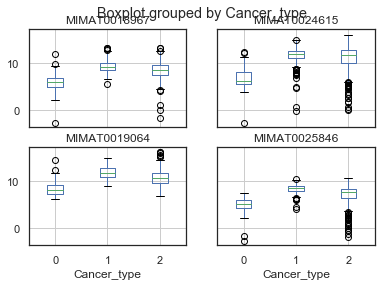

In [18]:
#4Top features

df.boxplot(column = ['MIMAT0018967', 'MIMAT0024615', 'MIMAT0019064', 'MIMAT0025846'], by='Cancer_type')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C1F535630>,
      dtype=object)

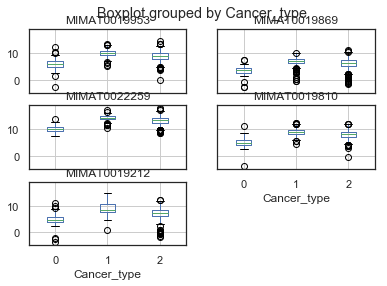

In [19]:
df.boxplot(column = ['MIMAT0019953', 'MIMAT0019869', 'MIMAT0022259', 'MIMAT0019810', 'MIMAT0019212'], by='Cancer_type')

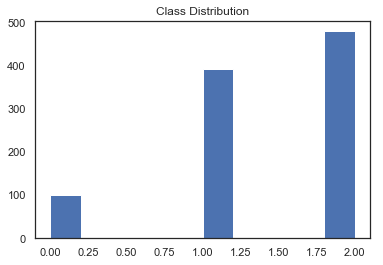

In [20]:
#results_df.where(results_df.pvalue < 0.01)   #tail(30)

#print(Cancer_Features.columns)

#print(column_list)

#print(df.Cancer_type)

plt.hist(df['Cancer_type'])
plt.title('Class Distribution')
plt.show()

In [21]:
Cancer_Features.describe()

,MIMAT0019953,MIMAT0019810,MIMAT0018967,MIMAT0025846,MIMAT0026636,MIMAT0019869,MIMAT0018977,MIMAT0024615,MIMAT0019212,MIMAT0004794,MIMAT0019064,MIMAT0019946,MIMAT0022259
count,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000
mean,9.007635,8.140865,8.558855,7.432598,4.760487,6.166123,5.356175,10.847220,7.641394,5.018942,10.876711,5.861292,13.360823
std,1.939351,1.842813,1.865222,1.809395,1.868356,1.976628,1.981671,2.610833,2.531192,2.023207,1.758291,2.018092,1.810520
min,-2.728000,-3.891000,-2.728000,-2.728000,-2.728000,-2.762000,-3.285000,-2.728000,-3.686000,-5.290000,6.077000,-1.520000,7.597000
25%,8.022500,7.237500,7.509500,6.695750,3.866250,5.223750,4.507500,9.955750,6.260250,4.237250,9.649750,4.807250,12.639500
50%,9.314000,8.410500,8.703500,7.985500,5.227000,6.558000,5.700500,11.670000,7.614500,5.570500,10.984500,6.016000,13.883000
75%,10.263500,9.300250,9.734750,8.595250,6.023000,7.471750,6.570750,12.588750,9.026000,6.415250,12.087250,7.126500,14.554000
max,14.450000,12.450000,13.312000,10.585000,9.614000,11.289000,10.396000,16.031000,14.763000,9.224000,16.242000,11.148000,17.965000


KMeans Clustering Let's look at KMeans clustering first. "K-means is a simple unsupervised machine learning algorithm that groups a dataset into a user-specified number (k) of clusters. The algorithm is somewhat naive--it clusters the data into k clusters, even if k is not the right number of clusters to use. Therefore, when using k-means clustering, users need some way to determine whether they are using the right number of clusters." One way to determine the number of cluster is through the "elbow" method. Using this method, we try a range of values for k and evaluate the "variance explained as a function of the number of clusters".

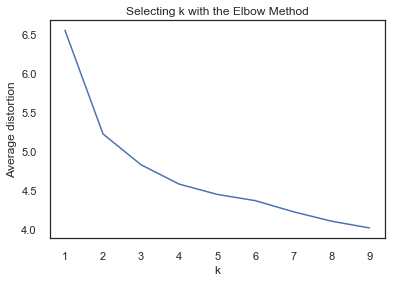

In [63]:
# Code adapted from https://www.packtpub.com/books/content/clustering-k-means
#from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import manifold
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.pairwise import euclidean_distances


K = range(1,10)
meandistortions = []

for k in K:

    elbow = KMeans(n_clusters=k, n_jobs=-1, random_state=1)
    elbow.fit(Cancer_Features)
    meandistortions.append(sum(np.min(euclidean_distances(Cancer_Features, elbow.cluster_centers_), axis=1)) / Cancer_Features.shape[0])

    
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()


If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. Our goal is to choose a small value of k that still has a low variance. The elbow usually represents where we start to have diminishing returns by increasing k. However, the elbow method doesn't always work well; especially if the data is not very clustered. Based on our plot, it looks like k=4 and k=5 are worth looking at. How do we measure which might be better? We can use the Silhouette Coefficient. A higher Silhouette Coefficient score relates to a model with better defined clusters.

In [23]:
kmeans = KMeans(n_clusters=5, n_jobs=-1, random_state=1)
kmeans.fit(Cancer_Features)
labels = kmeans.labels_
silhouette_score(Cancer_Features, labels, metric='euclidean')

0.1678556346649271

In [24]:
kmeans = KMeans(n_clusters=4, n_jobs=-1, random_state=1)
kmeans.fit(Cancer_Features)
labels = kmeans.labels_
silhouette_score(Cancer_Features, labels, metric='euclidean')

0.16418749058153778

We can see above, k=4 and k=5 have similar score. As implemented in scikit-learn, KMeans will use 8 clusters by default.
We might go with k=2 or k=3

In [25]:
# Code adapted from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
import matplotlib.cm as cm

def silhouette_plot(X, range_n_clusters = range(2,6, 1)):

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1
        ax1.set_xlim([-.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors)

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1],
                    marker='o', c="white", alpha=1, s=200)

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

For n_clusters = 2 The average silhouette_score is : 0.37706782279520096


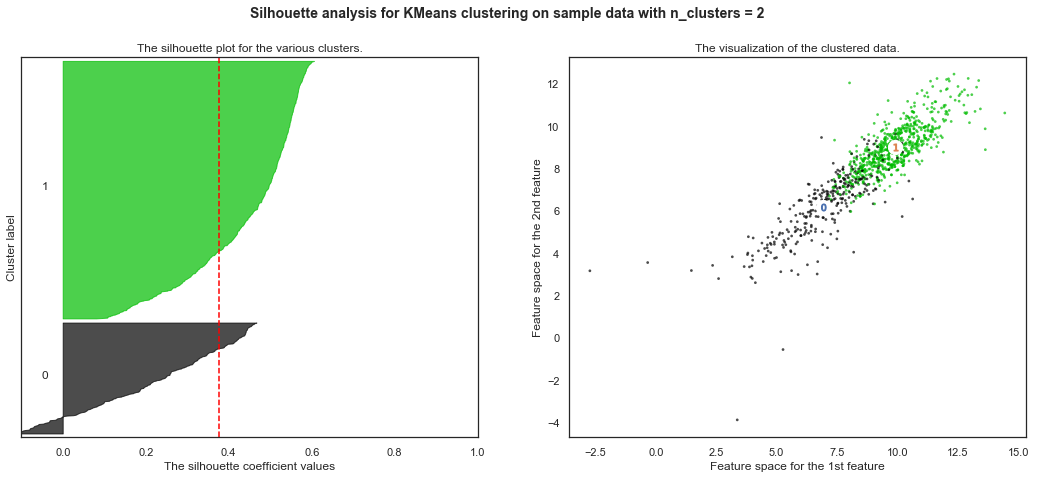

For n_clusters = 3 The average silhouette_score is : 0.22245855774915765


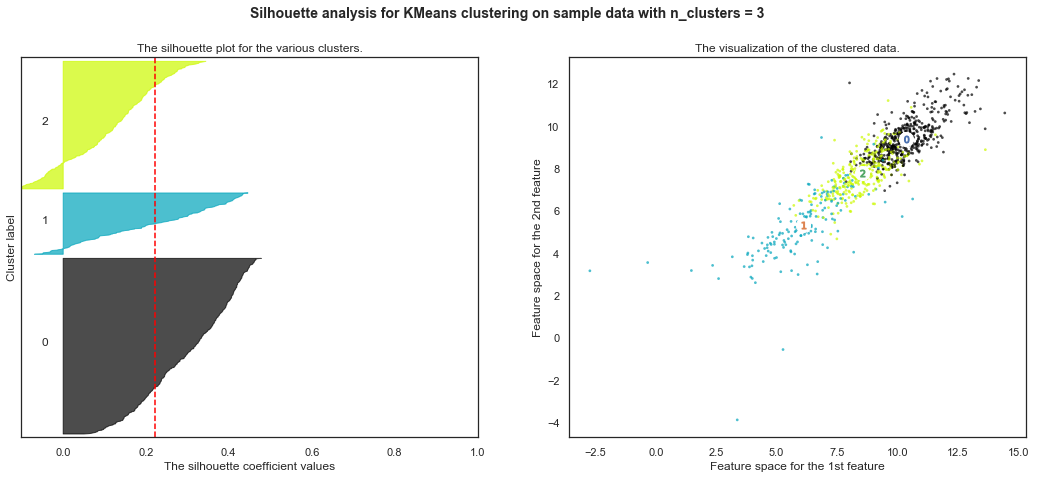

For n_clusters = 4 The average silhouette_score is : 0.16418749058153778


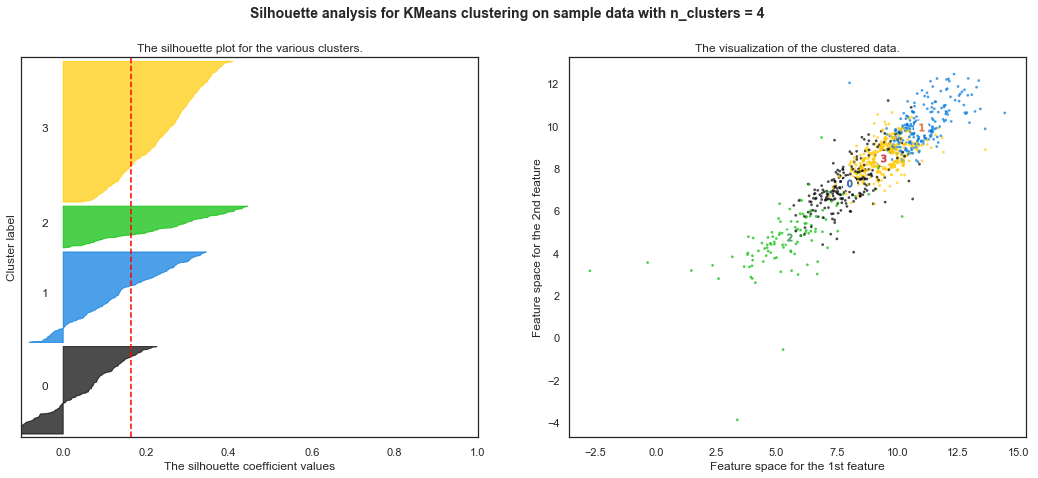

For n_clusters = 5 The average silhouette_score is : 0.16895125642507663


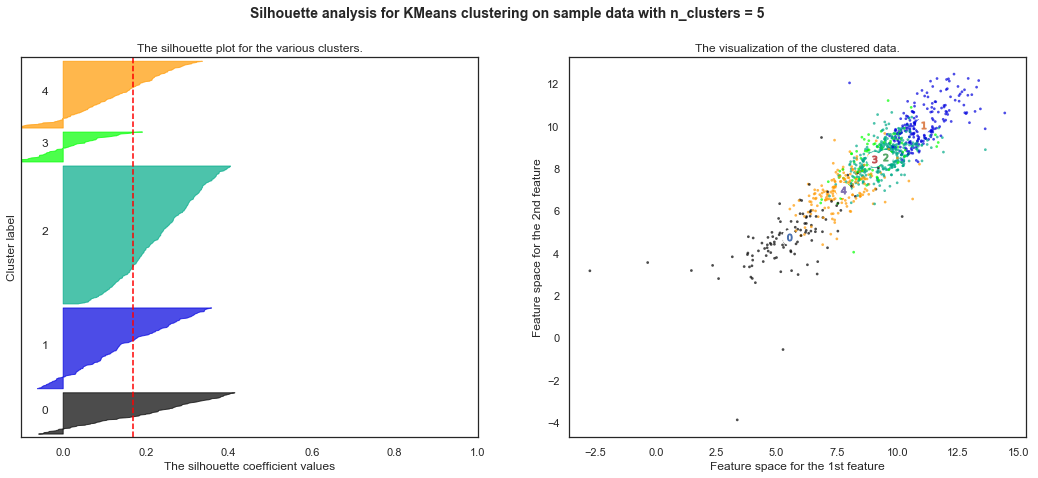

In [26]:
silhouette_plot(Cancer_Features)

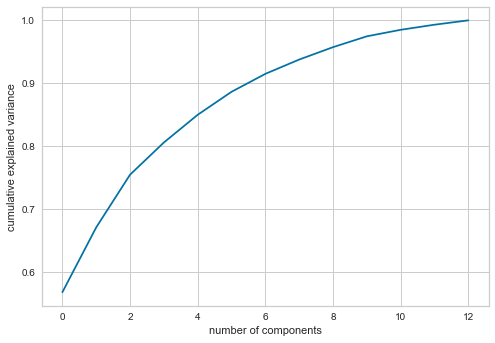

In [94]:
#If you want to create a separate plot per column, then you can iterate over each column and use plt.figure() to initiate a new figure for each plot.
#import matplotlib.pyplot as plt

"""
for column in df:
    plt.figure()
    df.boxplot([column])

#If you want to just put all columns into the same boxplot graph then you can just use df.plot(kind='box')

df.plot(kind='box')
"""

from sklearn.decomposition import PCA

#df = pd.DataFrame(data=np.random.normal(0, 1, (20, 10)))

pca = PCA().fit(Cancer_Features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');





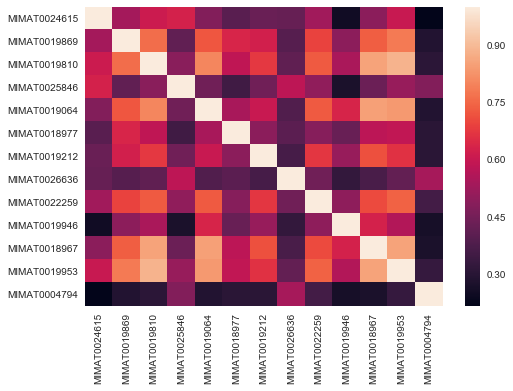

In [95]:
#Heatmap

# Calculate correlations
corr = Cancer_Features.corr()
 
# Heatmap
sns.heatmap(corr)

plt.savefig('Correlation_among_9Features.png', format='png', dpi=300)

Text(0.5, 1.0, 'Correlation among 9 fearures')

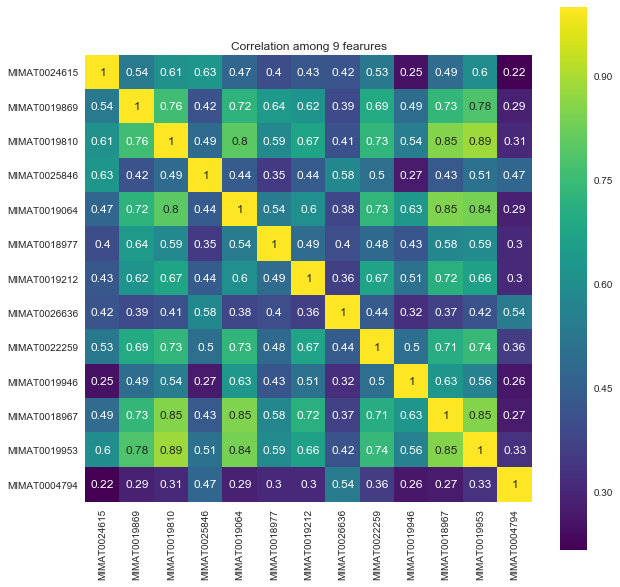

In [96]:
#Now we can get the correlation between the 'Cancer_type' and all the other features.
#df[df.columns[1:]].corr()['Cancer_type'][:]
correlation = Cancer_Features.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation among 9 fearures')

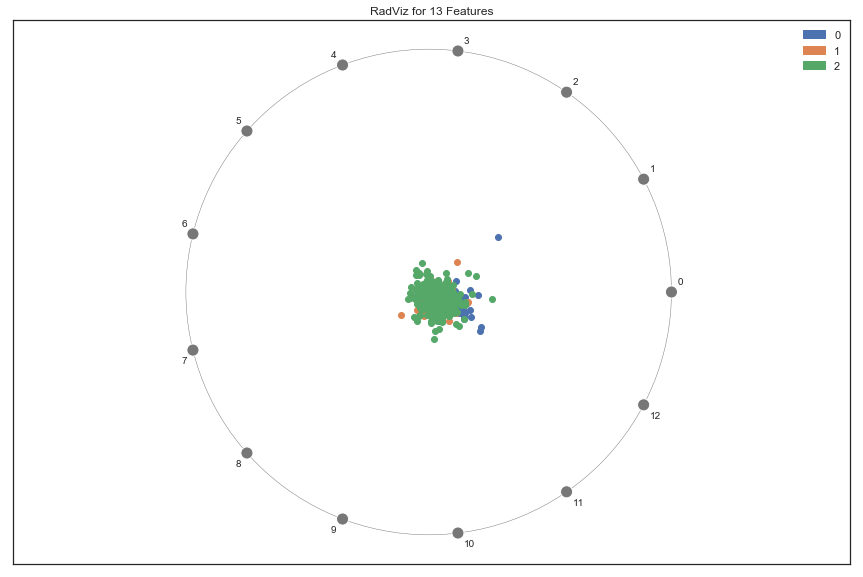

In [81]:
X = Cancer_Features.values
y = Cancer_Labels.values


from yellowbrick.features import RadViz

# Specify the target classes
classes = [0, 1, 2]

# Instantiate the visualizer
visualizer = RadViz(size=(1080, 720))

visualizer.fit(X, y)           # Fit the data to the visualizer
#visualizer.transform(X)        # Transform the data
visualizer.poof()              # Draw/show/poof the data

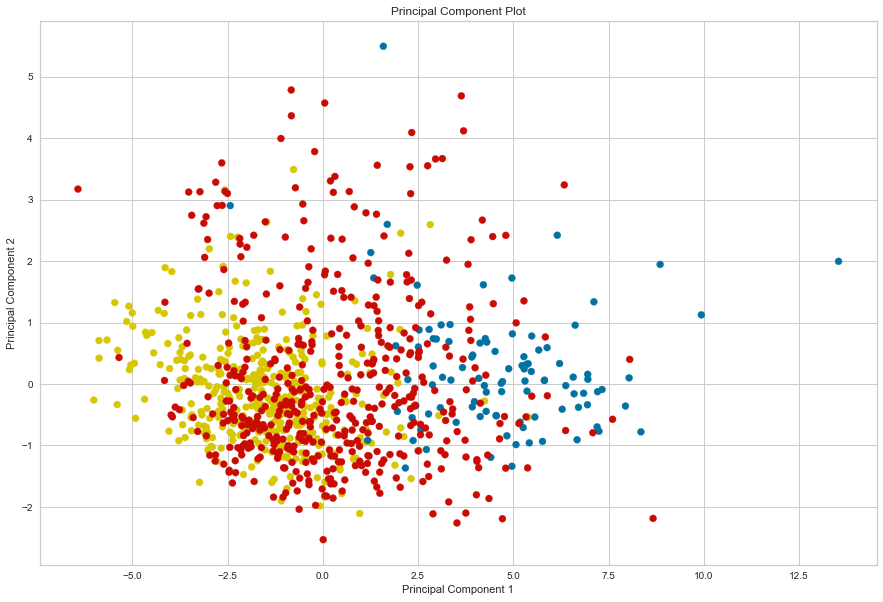

In [125]:
from yellowbrick.features.pca import PCADecomposition

# Create a list of colors to assign to points in the plot
colors = np.array(['b' if yi==0 else 'y' if  yi==1 else 'r' for yi in y])

visualizer = PCADecomposition(
    scale=True, color=colors, size=(1080, 720)
)
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

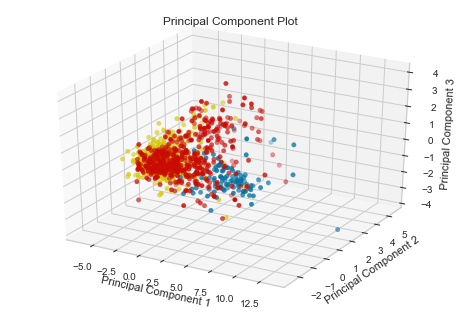

In [126]:
from yellowbrick.features.pca import PCADecomposition

# Create a list of colors to assign to points in the plot
#colors = np.array(['r' if yi else 'b' for yi in y])
colors = np.array(['b' if yi==0 else 'y' if  yi==1 else 'r' for yi in y])

visualizer = PCADecomposition(scale=True, color=colors, proj_dim=3)
#visualizer = PCADecomposition(scale=True, color=colors, size=(1080, 720))
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

In [37]:
import numpy as np
#from pandas_ml import ConfusionMatrix
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [17]:
#these piece of codes are learned from the Data Sciences Certficate course
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import precision_score

from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

import pickle

#split dataset for cross-validation

X_train, X_test, y_train, y_test = train_test_split(Cancer_Features, Cancer_Labels, test_size=0.3)



In [55]:
model = LinearRegression()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print('Linear Regression model')
print('Mean Squared Error: %0.3f' % mse(expected, predicted))
print('Coefficient of Determination: %0.3f' % r2_score(expected, predicted))



Linear Regression model
Mean Squared Error: 0.384
Coefficient of Determination: 0.076


In [56]:
model = LogisticRegression(random_state=1)

model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print('Linear Regression model')
print('Mean Squared Error: %0.3f' % mse(expected, predicted))
print('Coefficient of Determination: %0.3f' % r2_score(expected, predicted))



Linear Regression model
Mean Squared Error: 0.466
Coefficient of Determination: -0.122


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [67]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print('Ridge model')
print('Mean Squared Error: %0.3f' % mse(expected, predicted))
print('Coefficient of Determination: %0.3f' % r2_score(expected, predicted))

Ridge model
Mean Squared Error: 0.406
Coefficient of Determination: 0.145


In [79]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print('Support Vector Classifier')
print('Mean Squared Error: %0.3f' % mse(expected, predicted))
print('Coefficient of Determination: %0.3f' % r2_score(expected, predicted))
print('Precision Score: ') 
precision_score(expected, predicted, average=None)

pickle_on = open("pickle_SVC.pkl", "wb")
pickle.dump( model, pickle_on)
pickle_on.close()

Support Vector Classifier
Mean Squared Error: 0.380
Coefficient of Determination: 0.121
Precision Score: 


In [50]:
model = SVC(gamma= 0.00001 )
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print('Support Vector Classifier')
print('Mean Squared Error: %0.3f' % mse(expected, predicted))
print('Coefficient of Determination: %0.3f' % r2_score(expected, predicted))
#print('Precision Score: ') 
#precision_score(expected, predicted, average=None)

cm = confusion_matrix(expected, predicted)

pickle_on = open("pickle_SVC.pkl", "wb")
pickle.dump( model, pickle_on)
pickle_on.close()

Support Vector Classifier
Mean Squared Error: 0.247
Coefficient of Determination: 0.421


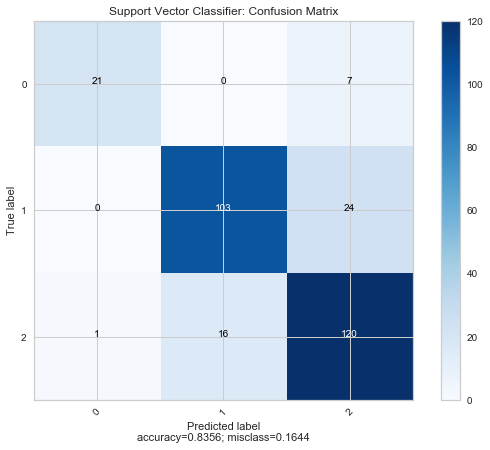

In [51]:
plot_confusion_matrix(cm,         
                      normalize    = False,
                      target_names = ['0', '1', '2'],
                      title        = "Support Vector Classifier: Confusion Matrix")


In [52]:
model = LinearSVC()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print('Linear Support Vector Classifier')
print('Mean Squared Error: %0.3f' % mse(expected, predicted))
print('Coefficient of Determination: %0.3f' % r2_score(expected, predicted))
print('Precision Score: ') 
precision_score(expected, predicted, average=None)

pickle_on = open("pickle_LSVC.pkl", "wb")
pickle.dump( model, pickle_on)
pickle_on.close()


Linear Support Vector Classifier
Mean Squared Error: 0.092
Coefficient of Determination: 0.783
Precision Score: 


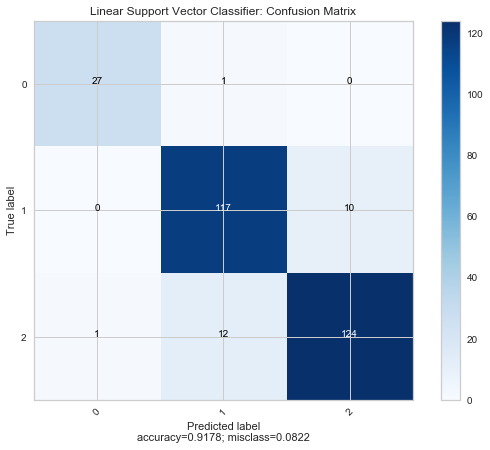

In [53]:
cm = confusion_matrix(expected, predicted)

plot_confusion_matrix(cm,         
                      normalize    = False,
                      target_names = ['0', '1', '2'],
                      title        = "Linear Support Vector Classifier: Confusion Matrix")

In [70]:
model =  KNeighborsClassifier()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print('K Nearst Neighbor Classifier')
print('Mean Squared Error: %0.3f' % mse(expected, predicted))
print('Coefficient of Determination: %0.3f' % r2_score(expected, predicted))
print('Precision Score: ') 
precision_score(expected, predicted, average=None)

K Nearst Neighbor Classifier
Mean Squared Error: 0.469
Coefficient of Determination: 0.011
Precision Score: 


array([0.7       , 0.64492754, 0.80701754])

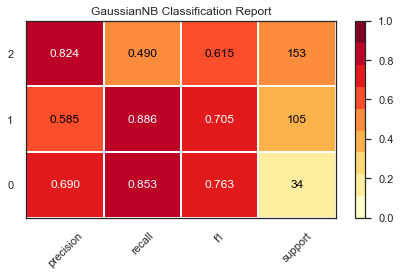

In [71]:
## C) GaussianNB Classifier and visualizer


bayes = GaussianNB()
visualizer = ClassificationReport(bayes, support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

In [54]:
model = SGDClassifier(max_iter=100, tol=1e-3)
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print('SGD Classifier')
print('Mean Squared Error: %0.3f' % mse(expected, predicted))
print('Coefficient of Determination: %0.3f' % r2_score(expected, predicted))
print('Precision Score: ') 
precision_score(expected, predicted, average=None)

pickle_on = open("pickle_SGDC.pkl", "wb")
pickle.dump( model, pickle_on)
pickle_on.close()


SGD Classifier
Mean Squared Error: 0.127
Coefficient of Determination: 0.702
Precision Score: 


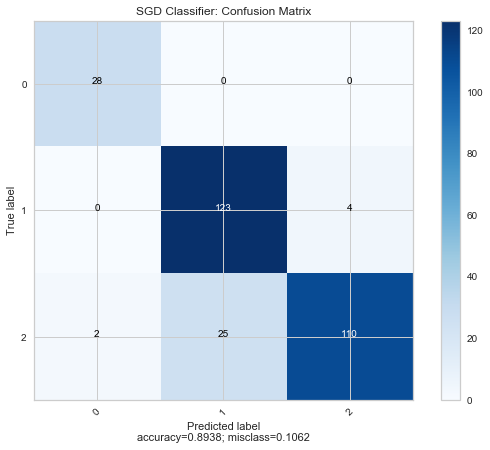

In [55]:
cm = confusion_matrix(expected, predicted)

plot_confusion_matrix(cm,         
                      normalize    = False,
                      target_names = ['0', '1', '2'],
                      title        = "SGD Classifier: Confusion Matrix")

In [48]:
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print('Extra Trees Classifier')
print('Mean Squared Error: %0.3f' % mse(expected, predicted))
print('Coefficient of Determination: %0.3f' % r2_score(expected, predicted))
print('Precision Score: ') 
precision_score(expected, predicted, average=None)

pickle_on = open("pickle_ETC.pkl", "wb")
pickle.dump( model, pickle_on)
pickle_on.close()


Extra Trees Classifier
Mean Squared Error: 0.178
Coefficient of Determination: 0.582
Precision Score: 


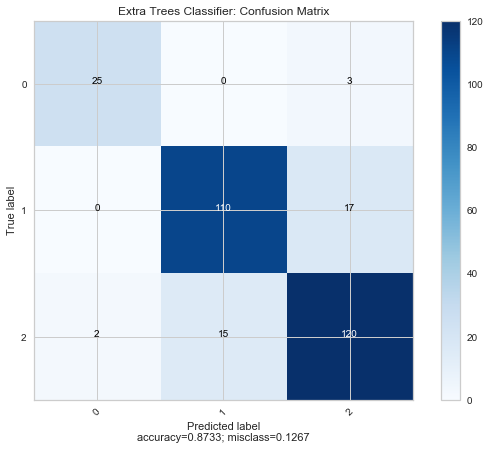

In [49]:
cm = confusion_matrix(expected, predicted)

plot_confusion_matrix(cm,         
                      normalize    = False,
                      target_names = ['0', '1', '2'],
                      title        = "Extra Trees Classifier: Confusion Matrix")

In [56]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print('Random Forest model')
print('Mean squared error = %0.3f' % mse(expected, predicted))
print('Coefficient of Determination = %0.3f' % r2_score(expected, predicted))
#print('Precision Score: ') 
#precision_score(expected, predicted, average=None)

pickle_on = open("pickle_RFregressor.pkl", "wb")
pickle.dump( model, pickle_on)
pickle_on.close()



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest model
Mean squared error = 0.104
Coefficient of Determination = 0.756


In [58]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.features import FeatureImportances

model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print('Random Forest model')
print('Mean squared error = %0.3f' % mse(expected, predicted))
print('Coefficient of Determination = %0.3f' % r2_score(expected, predicted))
#print('Precision Score: ') 
#precision_score(expected, predicted, average=None)

pickle_on = open("pickle_RFC.pkl", "wb")
pickle.dump( model, pickle_on)
pickle_on.close()


Random Forest model
Mean squared error = 0.154
Coefficient of Determination = 0.638


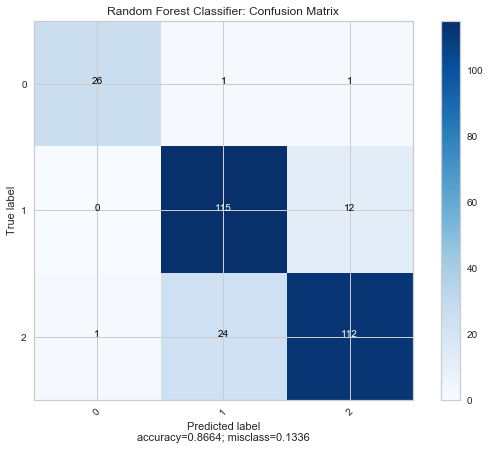

In [59]:
cm = confusion_matrix(expected, predicted)

plot_confusion_matrix(cm,         
                      normalize    = False,
                      target_names = ['0', '1', '2'],
                      title        = "Random Forest Classifier: Confusion Matrix")

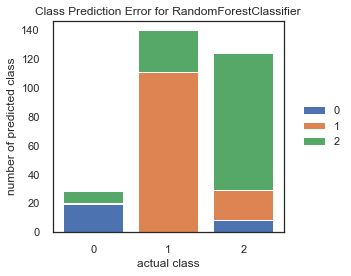

In [72]:
visualizer2 = ClassPredictionError(RandomForestClassifier(n_estimators=10))

# Fit the training data to the visualizer
visualizer2.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer2.score(X_test, y_test)

# Draw visualization
visualizer2.poof()



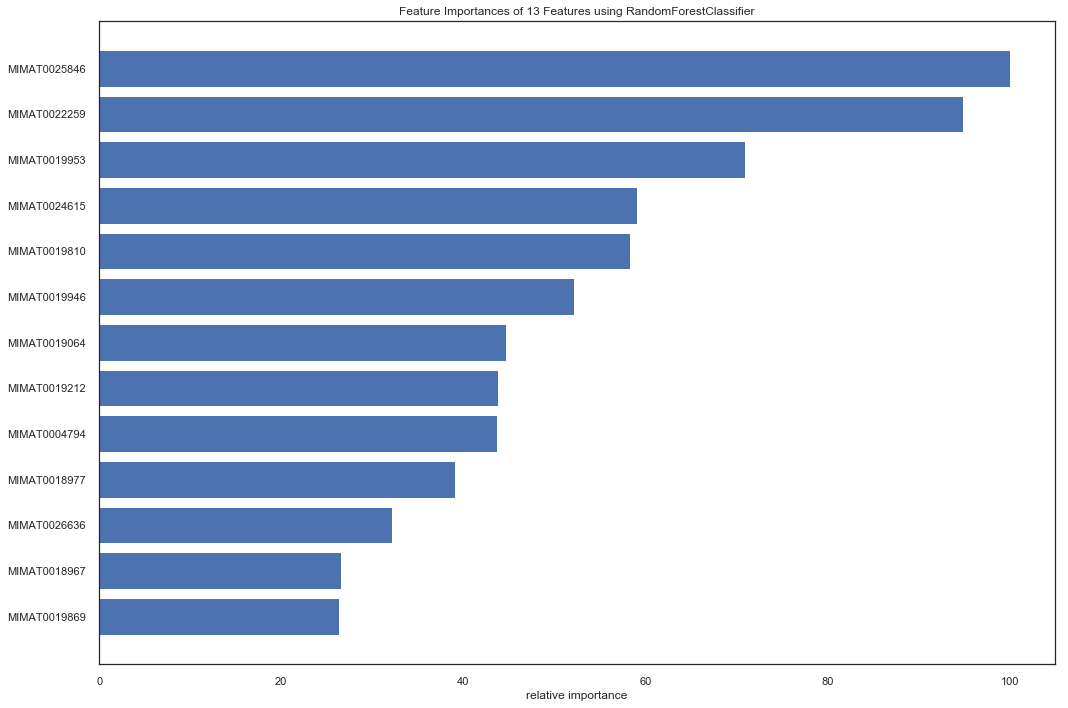

In [73]:
viz = FeatureImportances(model, size=(1080, 720))

viz.fit(X_train, y_train)

viz.score(X_train, y_train)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
viz.poof()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022465D42F28>,
      dtype=object)

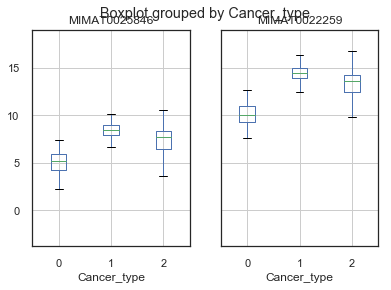

In [74]:
df.boxplot(column = ['MIMAT0025846', 'MIMAT0022259'], by='Cancer_type')

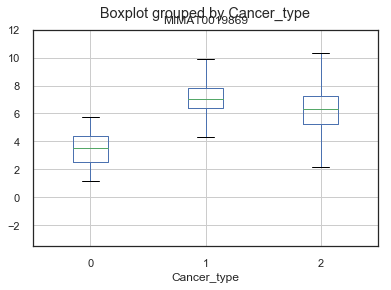

In [97]:
df.boxplot(column = ['MIMAT0019869'], by='Cancer_type')

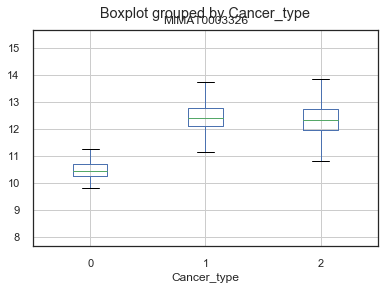

In [98]:
df.boxplot(column = ['MIMAT0003326'], by='Cancer_type')

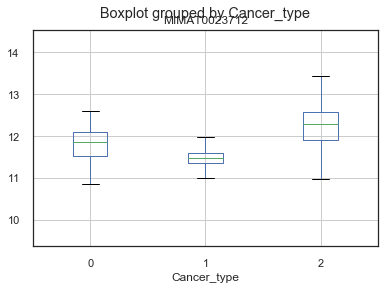

In [83]:
df.boxplot(column = ['MIMAT0023712'], by='Cancer_type')

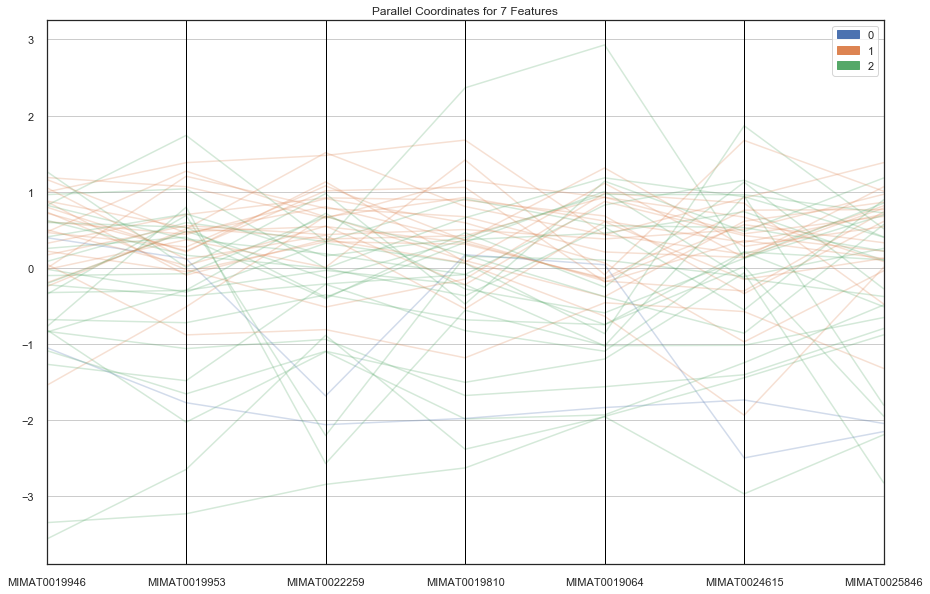

In [105]:
from yellowbrick.features import ParallelCoordinates



classes = [0, 1, 2]

good_features = ['MIMAT0004794', 'MIMAT0019946', 'MIMAT0019953', 'MIMAT0026636', 'MIMAT0022259', 'MIMAT0019869', 'MIMAT0019810', 
                 'MIMAT0019064', 'MIMAT0019212', 'MIMAT0018977', 'MIMAT0024615', 'MIMAT0025846', 'MIMAT0018967']

good_features2 = ['MIMAT0004794', 'MIMAT0019946', 'MIMAT0019953',  'MIMAT0022259', 'MIMAT0019810', 
                  'MIMAT0019064', 'MIMAT0019212', 'MIMAT0024615', 'MIMAT0025846']

good_features3 = ['MIMAT0019946', 'MIMAT0019953',  'MIMAT0022259', 'MIMAT0019810', 
                  'MIMAT0019064', 'MIMAT0024615', 'MIMAT0025846']


X = df[good_features3]


# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=good_features3, 
    #features,
    normalize='standard', # This time we'll specify a normalizer
    sample=0.05, shuffle=True, size=(1080, 720)
)

# Fit the visualizer and display it
visualizer.fit(X, y)
visualizer.transform(X)

visualizer.poof()

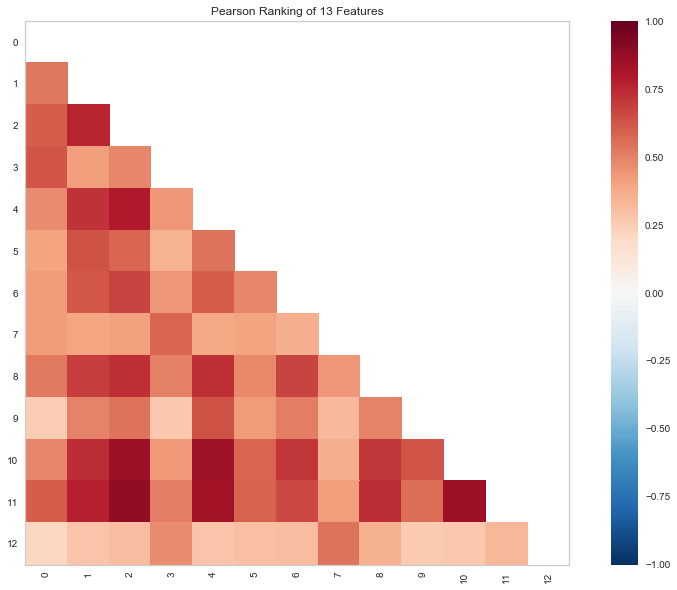

In [114]:
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson', size=(1080, 720))

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

Correlation

Now we'll try to find which features are strongly correlated with SalePrice. We'll store them in a var called golden_features_list. We'll reuse our df_num dataset to do so.

Evaluating Classifiers
Classification models attempt to predict a target in a discrete space, that is assign an instance of dependent variables one or more categories. Classification score visualizers display the differences between classes as well as a number of classifier-specific visual evaluations.
ROCAUC

A ROCAUC (Receiver Operating Characteristic/Area Under the Curve) plot allows the user to visualize the tradeoff between the classifier’s sensitivity and specificity.
The Receiver Operating Characteristic (ROC) is a measure of a classifier’s predictive quality that compares and visualizes the tradeoff between the model’s sensitivity and specificity. When plotted, a ROC curve displays the true positive rate on the Y axis and the false positive rate on the X axis on both a global average and per-class basis. The ideal point is therefore the top-left corner of the plot: false positives are zero and true positives are one.
This leads to another metric, area under the curve (AUC), which is a computation of the relationship between false positives and true positives. The higher the AUC, the better the model generally is. However, it is also important to inspect the “steepness” of the curve, as this describes the maximization of the true positive rate while minimizing the false positive rate.

Yellowbrick’s ROCAUC Visualizer also allows for plotting multiclass classification curves. ROC curves are typically used in binary classification, and in fact the Scikit-Learn roc_curve metric is only able to perform metrics for binary classifiers. Yellowbrick addresses this by binarizing the output (per-class) or to use one-vs-rest (micro score) or one-vs-all (macro score) strategies of classification.


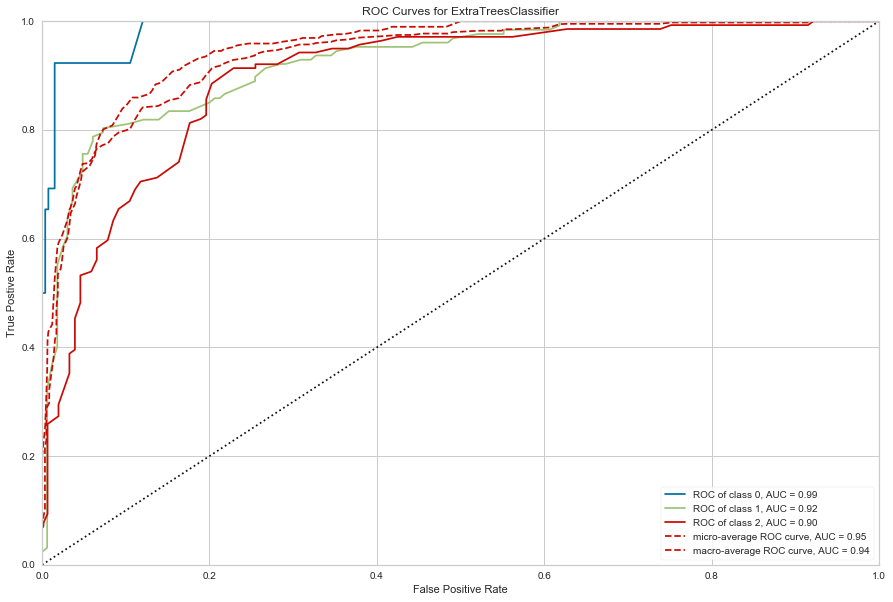

In [38]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from yellowbrick.classifier import ROCAUC


visualizer = ROCAUC(
    ExtraTreesClassifier(n_estimators=100), classes=classes, size=(1080, 720)
#    RidgeClassifier(), classes=classes, size=(1080, 720)
)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

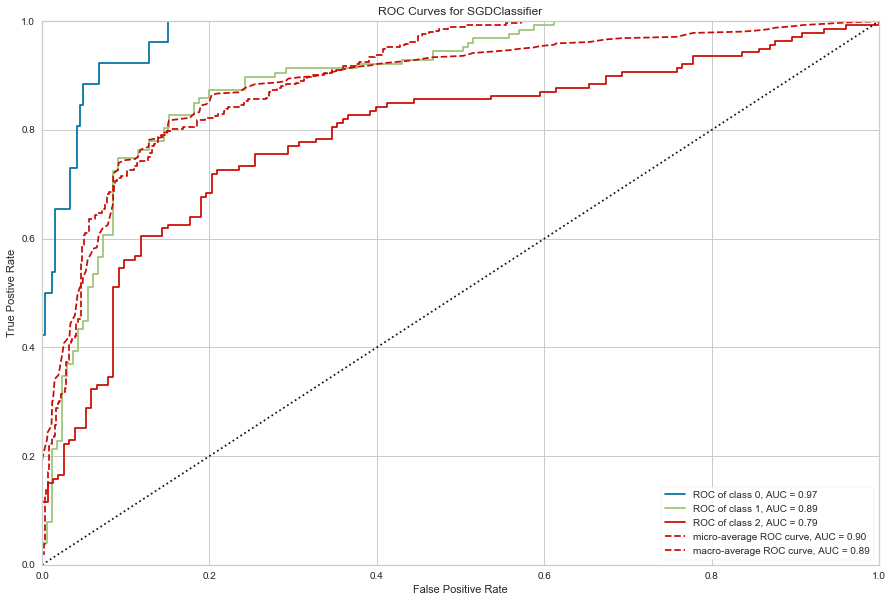

In [40]:
visualizer = ROCAUC(
#    ExtraTreesClassifier(n_estimators=100), classes=classes, size=(1080, 720)
    SGDClassifier(max_iter=100, tol=1e-3), classes=classes, size=(1080, 720)
#    RidgeClassifier(), classes=classes, size=(1080, 720)
)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


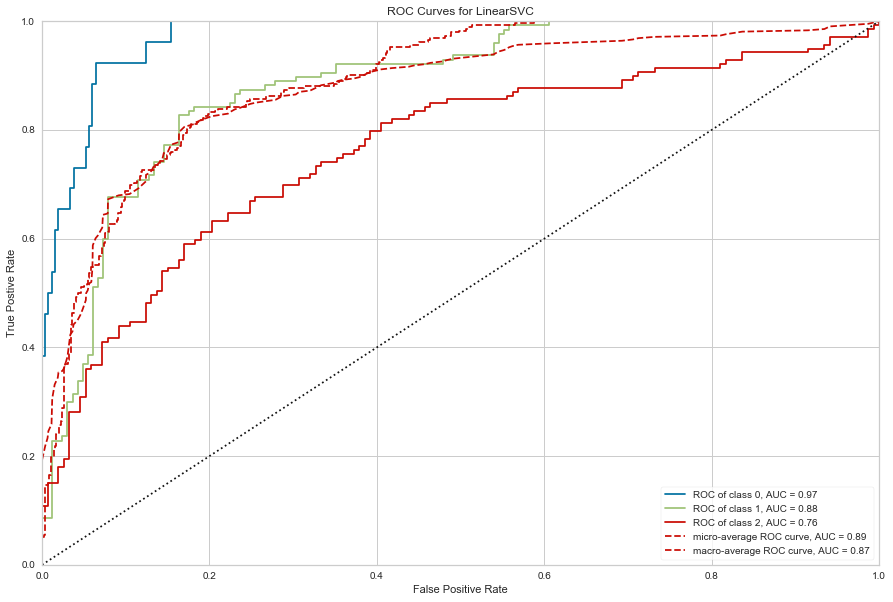

In [41]:
visualizer = ROCAUC(
#    ExtraTreesClassifier(n_estimators=100), classes=classes, size=(1080, 720)
      LinearSVC(), classes=classes, size=(1080, 720)
#    RidgeClassifier(), classes=classes, size=(1080, 720)
)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

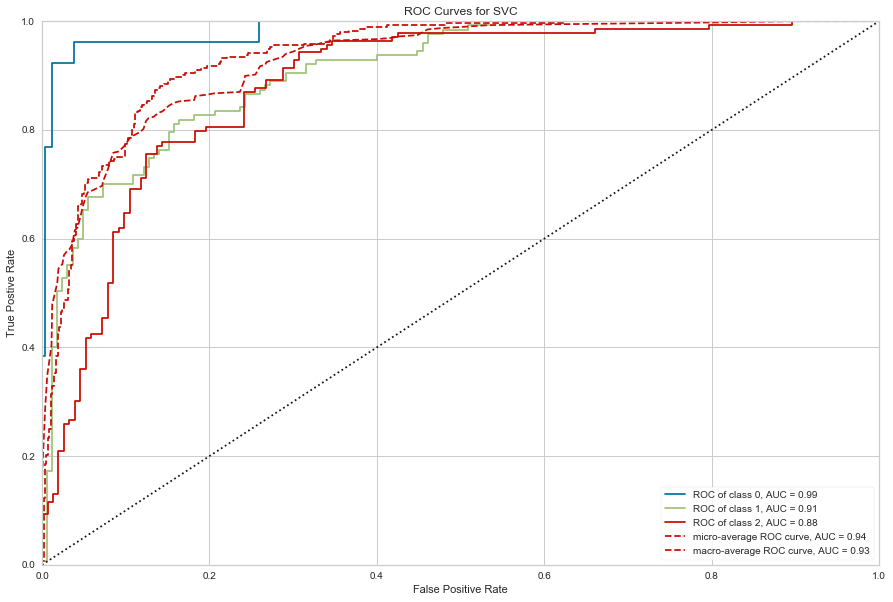

In [43]:
visualizer = ROCAUC(
#    ExtraTreesClassifier(n_estimators=100), classes=classes, size=(1080, 720)
     SVC(gamma='auto'), classes=classes, size=(1080, 720)
#    RidgeClassifier(), classes=classes, size=(1080, 720)
)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

Apparently, the Extra Trees Classifier and the SVC achieved the best performance

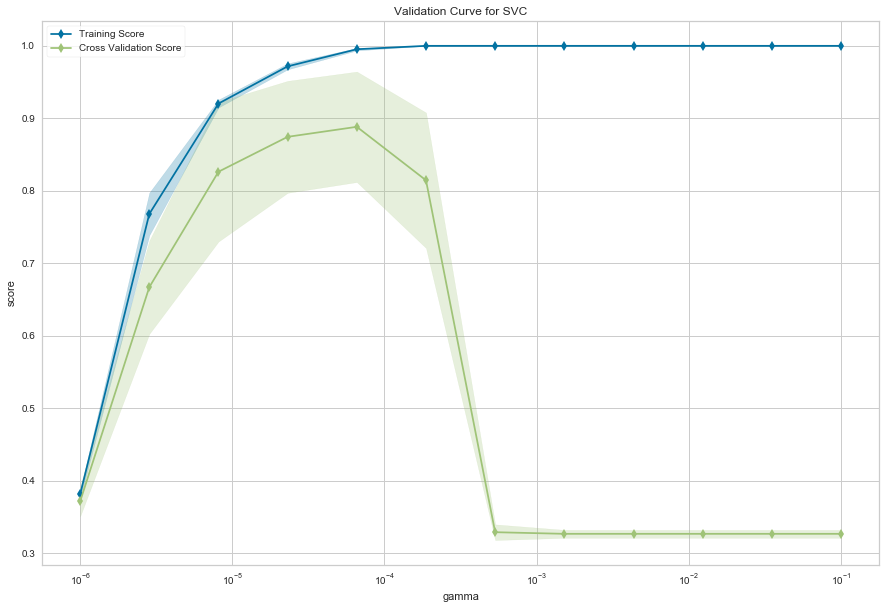

In [32]:
#Let's spend sometime to fine-tune the hyper-parameters in SVC

from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import ValidationCurve


# Load a classification data set
#X, y = load_game()

# Encode the categorical data with one-hot encoding
#X = OneHotEncoder().fit_transform(X)

# Create the validation curve visualizer
cv = StratifiedKFold(12)
param_range = np.logspace(-6, -1, 12)

viz = ValidationCurve(
    SVC(), param_name="gamma", param_range=param_range,
    logx=True, cv=cv, scoring="f1_weighted", n_jobs=8,  size=(1080, 720)
)

viz.fit(X, y)
viz.poof()

In [ ]:
Apparently, gamma is optimum between 10-4 and 10-5 .